# Relatório Técnico Enológico
## Avaliação da Qualidade de Vinhos Tintos com Base em Características Físico-Químicas
*  ### 📌Contexto do Projeto
##### A EnoInsights Analytics, empresa fictícia especializada em análise preditiva para o setor vitivinícola, atua apoiando vinícolas no uso de ciência de dados para aprimorar a qualidade de seus produtos e entender os fatores que impactam diretamente na avaliação sensorial dos vinhos. Recentemente, a empresa foi contratada por uma renomada vinícola do Vale do Douro interessada em compreender os fatores físico-químicos que influenciam a percepção de qualidade dos seus vinhos tintos. A vinícola deseja aplicar esse conhecimento para otimizar seus processos produtivos e garantir que cada rótulo lançado no mercado atinja altos padrões de excelência. Como cientista de dados da EnoInsights Analytics, fui designado para liderar esse estudo técnico, com base em um conjunto de dados público contendo amostras químicas de vinhos tintos, já avaliadas por especialistas em enologia.

*  ### 📊Sumário Executivo
    * #### Este relatório está estruturado em seções que seguem o ciclo típico de um projeto de ciência de dados aplicado:

         1. Importação de Bibliotecas
        
         2. Introdução e objetivo do projeto

         3. Sumário do conjunto de dados

         4. Análise exploratória de dados (EDA)

         5. Preparação e tratamento dos dados

         6. Construção de modelo de classificação da qualidade dos vinhos

         7. Avaliação de desempenho do modelo

         8. Conclusões e recomendações

       



*  ### 🧭Estratégia de Solução
    * #### Etapas do processo analítico:

        * Importação e visualização inicial do dataset;

        * Verificação de estrutura e dimensões do conjunto de dados;

        * Análise de valores nulos e tratamento, se necessário;

        * Verificação dos tipos de variáveis (numéricas, categóricas);

        * Estatísticas descritivas para cada variável;

        * Visualizações univariadas (histogramas, boxplots);

        * Visualizações bivariadas (matriz de correlação, scatterplots);

        * Análise de distribuições conforme a variável target (quality);

        * Formulação e testes de hipóteses estatísticas;

        * Aplicação de algoritmos de classificação

        * Avaliação de desempenho (acurácia, precisão, recall, F1-score)

        * Extração de variáveis mais importantes (feature importance)

     



*  ### ❓Questionamentos do CEO da Vinícola Contratante
    * #### Durante as reuniões iniciais, o CEO da vinícola contratante levantou os seguintes questionamentos estratégicos:

        * Quais características químicas estão mais fortemente associadas aos vinhos de melhor qualidade?

        * Vinhos com teor alcoólico mais alto tendem a receber notas mais elevadas?

        * A acidez (fixa ou volátil) influencia negativamente a percepção de qualidade?



        



*  ### 🎯Objetivo Final
 ##### O objetivo central deste estudo é construir um modelo de classificação da qualidade dos vinhos tintos, com base em dados físico-químicos coletados em laboratório. Esse modelo deverá ser capaz de prever, com alta precisão, se um vinho receberá uma avaliação sensorial positiva (nota alta) ou negativa (nota baixa). A partir disso, serão oferecidas recomendações práticas para a vinícola, visando otimizar a formulação de seus produtos e direcionar a produção para características que impactem positivamente a percepção do consumidor final.



* ### 🗂️Dicionário dos dados fornecidos pela empresa:

    * fixed acidity - Refere-se à acidez resultante da presença de ácidos orgânicos pouco voláteis, como málico, lático, tartárico ou cítrico, encontrados no vinho;
    * volatile acidity - Refere-se ao nível de acidez causado por ácidos leves, principalmente o ácido acético, que conferem ao vinho aromas e sabores semelhantes ao do vinagre;
    * citric acid - Concentração de ácido cítrico encontrada no vinho;
    * residual sugar - Nível de açúcar não fermentado da uva que ainda está presente no vinho;
    * chlorides - concentração de cloretos(sais) no vinho;
    * free sulfur dioxide - concentração de dióxido de enxofre livre no vinho, refere-se as falta de ligação com outras moléculas;
    * total sulfur dioxide - concentração de dióxido de enxofre total no vinho, refere-se ao livres mais a parte que possui ligação com outras moléculas;
    * density - densidade do vinho;
    * pH - nível de ph do vinho;
    * sulphates - concentração de sulfatos no vinho;
    * alcohol - nível de concentração de álcool no vinho.

* ### 🍷Variável alvo(target) : quality - Qualidade do vinho

# 1. Importação de Bibliotecas

In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


# 2. Introdução e Objetivo do Projeto

Este projeto tem como finalidade realizar uma análise exploratória e desenvolver um modelo preditivo voltado para a classificação da qualidade de vinhos tintos, com base em suas características físico-químicas. O conjunto de dados utilizado contém informações laboratoriais de diferentes amostras de vinho, incluindo variáveis como teor alcoólico, acidez, nível de sulfatos, entre outras.

A variável alvo (target) deste estudo é a coluna quality, que representa a nota atribuída a cada amostra por especialistas, em uma escala sensorial. A partir da compreensão dos padrões presentes nos dados, pretende-se construir um modelo capaz de prever a faixa de qualidade de um vinho com base apenas em seus atributos químicos.

Esse modelo poderá auxiliar vinícolas a tomar decisões mais precisas no controle de produção, formulação de produtos e melhoria da qualidade percebida pelos consumidores.

# 3. Sumário do Conjunto de Dados

* ### Importando Dados

In [5]:
dados = pd.read_csv("C:/Users/lmr_b/OneDrive/Área de Trabalho/projetos_python/red_wine_quality/data/winequality-red.csv")
dados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


*  fixed acidity             | Acidez fixa                  
*  volatile acidity          | Acidez volátil               
*  citric acid               | Ácido cítrico                
*  residual sugar            | Açúcar residual              
*  chlorides                 | Cloretos                     
*  free sulfur dioxide       | Dióxido de enxofre livre     
*  total sulfur dioxide      | Dióxido de enxofre total     
*  density                   | Densidade                    
*  pH                        | pH                           
*  sulphates                 | Sulfatos                     
*  alcohol                   | Teor alcoólico               
*  quality                   | Qualidade                    

* ### Verificação de estrutura e dimensões do conjunto de dados

In [65]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* ### Análise de valores nulos e tratamento (se necessário)

In [19]:
dados.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* ### Verificação dos tipos de variáveis 

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 4. Análise exploratória de dados (EDA)

* ### Analisando primeiramente a variável alvo (quality)

In [21]:
dados["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [24]:
dados["quality"].value_counts().reset_index()

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


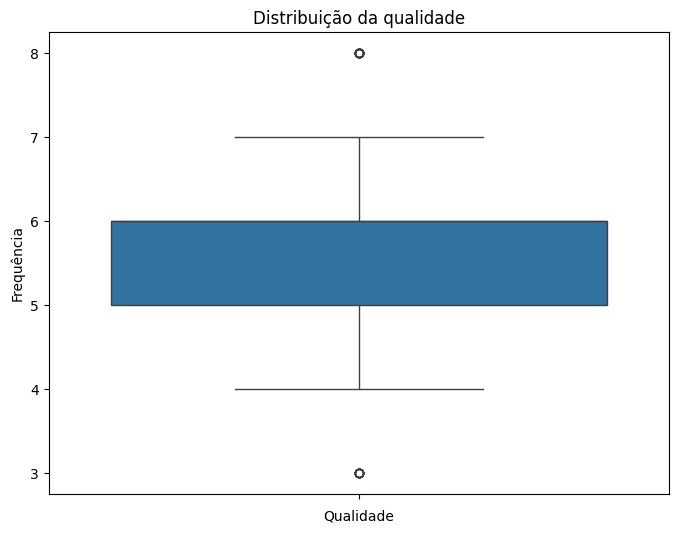

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(dados['quality'])
plt.title('Distribuição da qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.show()


<font style="color: red">
Ao analisarmos a distribuição da variável alvo quality, observamos uma clara concentração de amostras nos níveis de qualidade 5 e 6, que somam juntas 1.319 registros dos 1.599 disponíveis, o que representa aproximadamente 82,5% do total. Esse comportamento indica uma distribuição assimétrica, onde a maior parte dos vinhos se encontra em uma faixa de avaliação intermediária. A presença de valores extremos (outliers) é perceptível tanto na tabela de contagem quanto no boxplot. Especificamente, identificamos:

    18 amostras com qualidade 8, consideradas outliers superiores;
    10 amostras com qualidade 3, consideradas outliers inferiores.
</font>

* ### Analisando a variável (fixed acidity)

In [45]:
dados["fixed acidity"].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [26]:
dados["fixed acidity"].value_counts()

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
14.3     1
12.1     1
15.9     1
4.9      1
5.5      1
Name: count, Length: 96, dtype: int64

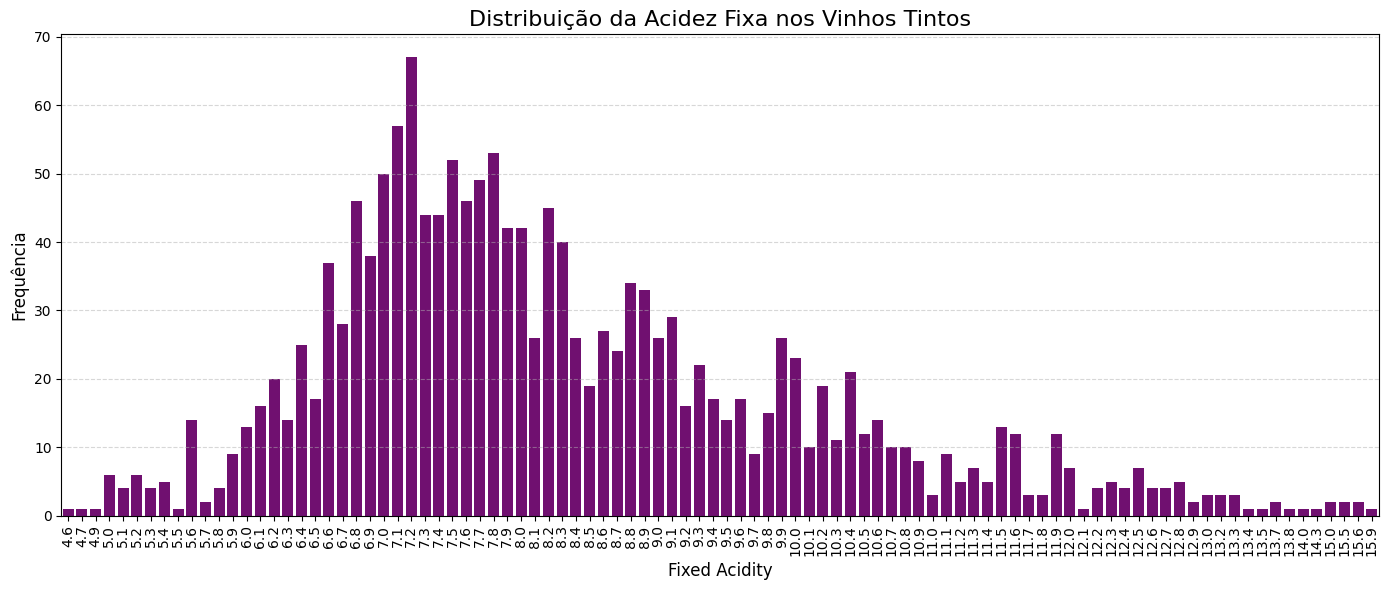

In [143]:
# Contagem dos valores únicos de 'fixed acidity'
acidez_fixa = dados['fixed acidity'].value_counts().sort_index()  # ordena pela acidez crescente

# Criando o gráfico
plt.figure(figsize=(14, 6))  
sns.barplot(x=acidez_fixa.index, y=acidez_fixa.values, color='purple')
plt.title('Distribuição da Acidez Fixa nos Vinhos Tintos', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  # gira os valores do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

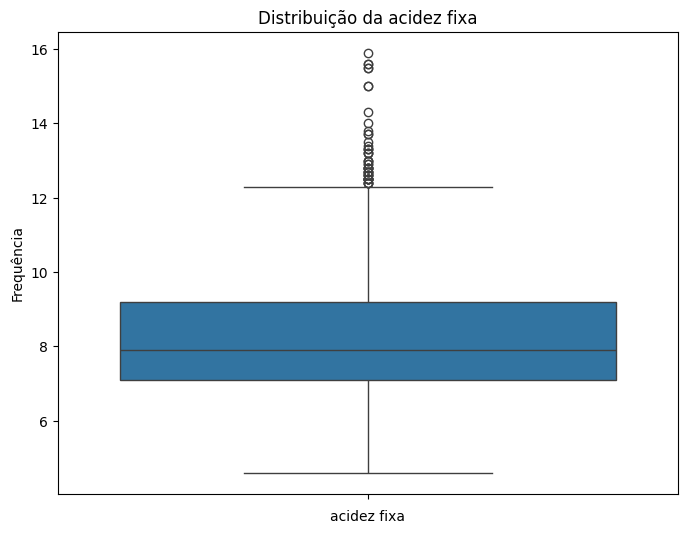

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(dados['fixed acidity'])
plt.title('Distribuição da acidez fixa')
plt.xlabel('acidez fixa')
plt.ylabel('Frequência')
plt.show()

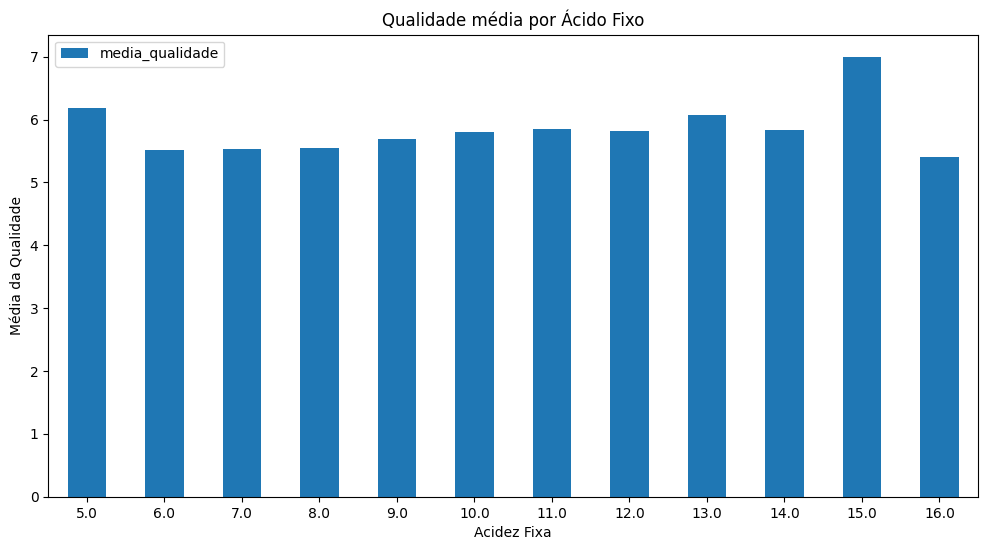

In [184]:
dados["fixed_acidity_arred"] = dados["fixed acidity"].round(0)
acidofixo_qualidade = dados.groupby("fixed_acidity_arred").agg(media_qualidade = ("quality","mean")).reset_index()
acidofixo_qualidade["fixed_acidity_arred"] = acidofixo_qualidade["fixed_acidity_arred"]
acidofixo_qualidade.plot(x = "fixed_acidity_arred", y = "media_qualidade", kind = "bar", title = "Qualidade média por Ácido Fixo",figsize=(12, 6))
plt.xticks(rotation = 0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Acidez Fixa");

<font style="color: red">
A partir da análise conjunta do gráfico de barras e do boxplot da variável acidez fixa, é possível observar que a maior concentração de valores está no intervalo entre aproximadamente 6 e 9, o que representa a faixa mais frequente entre os vinhos analisados. Essa concentração é evidenciada no boxplot, que mostra a densidade dos dados nessa região.
Valores mais altos de acidez fixa, como os acima de 12, aparecem com menor frequência na amostra e são destacados no boxplot como potenciais outliers. No entanto, ao analisarmos o gráfico de barras, nota-se que esses valores, apesar de menos comuns, não estão necessariamente associados a uma menor qualidade média. Por exemplo, vinhos com acidez fixa em torno de 15 apresentaram uma das maiores médias de qualidade da amostra.
Esse resultado indica que a acidez fixa, por si só, não determina a qualidade do vinho, mas pode estar relacionada a padrões específicos de produção ou características distintas. Portanto, embora exista uma faixa predominante entre 6 e 9, os valores fora desse intervalo também podem estar associados a vinhos de boa qualidade.
</font>

* ### Analisando a variável (volatile acidity)

In [46]:
dados["volatile acidity"].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [51]:
dados["volatile acidity"].value_counts()

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.580    38
         ..
1.005     1
0.955     1
1.580     1
1.180     1
0.895     1
Name: count, Length: 143, dtype: int64

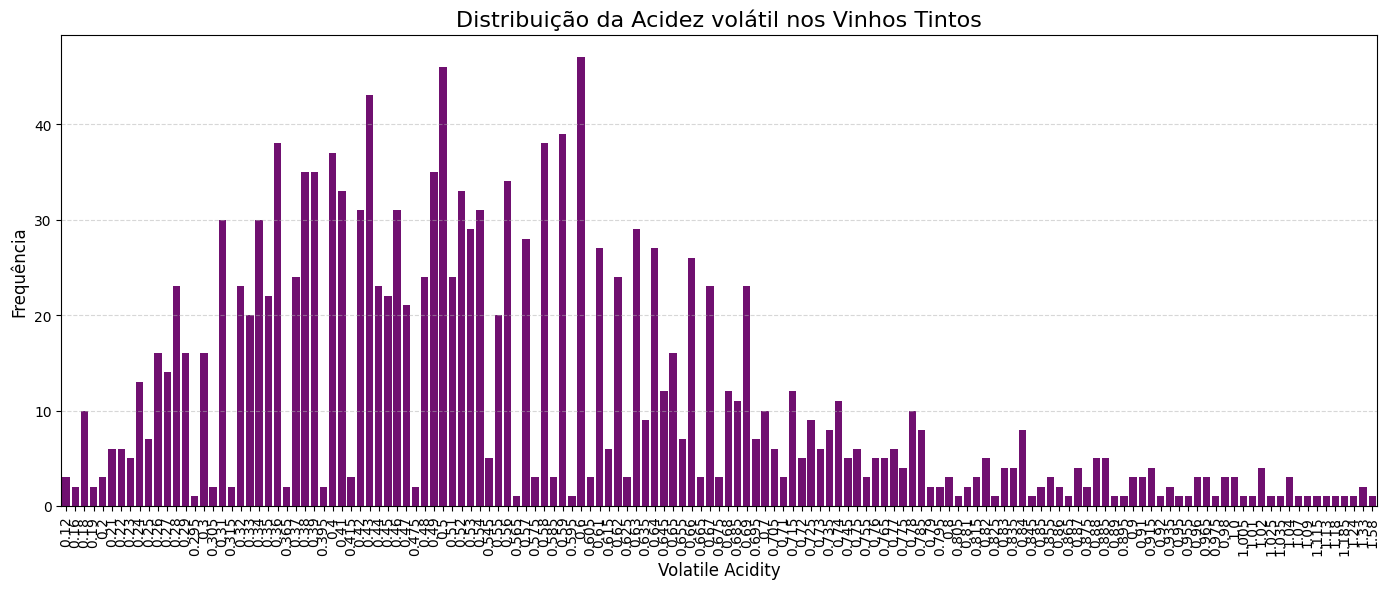

In [ ]:
acidez_volatil = dados['volatile acidity'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=acidez_volatil.index, y=acidez_volatil.values, color='purple')
plt.title('Distribuição da Acidez volátil nos Vinhos Tintos', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

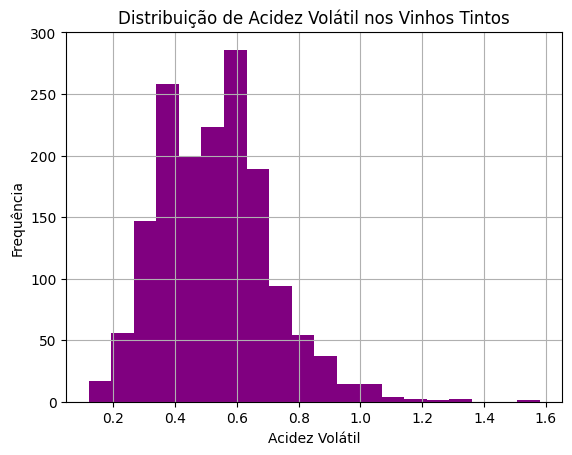

In [199]:
plt.hist(dados['volatile acidity'], bins=20, color='purple')
plt.xlabel('Acidez Volátil')
plt.ylabel('Frequência')
plt.title('Distribuição de Acidez Volátil nos Vinhos Tintos')
plt.grid(True)
plt.show()

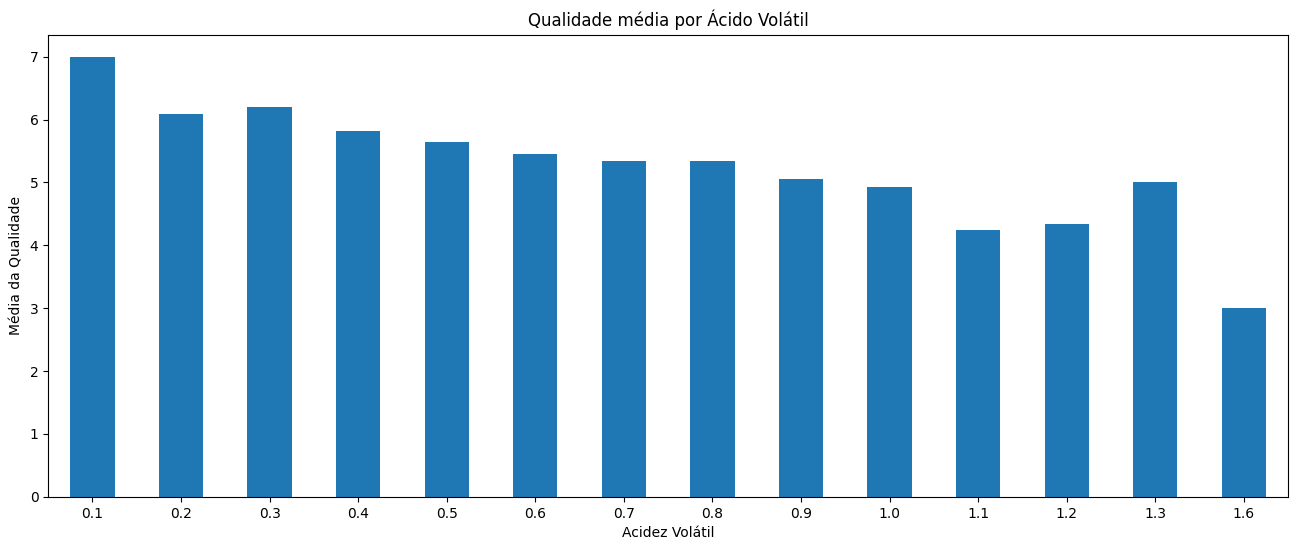

In [185]:
dados["acidez_volatil"] = dados["volatile acidity"].round(1)
acidovolatil_qualidade = dados.groupby("acidez_volatil").agg( media_qualidade=("quality", "mean")).reset_index()
acidovolatil_qualidade.plot(x="acidez_volatil",y="media_qualidade",kind="bar",title="Qualidade média por Ácido Volátil",legend=False,figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Acidez Volátil")
plt.show()

<font style="color: red">
Com base na análise dos gráficos da variável acidez volátil nos vinhos tintos, observa-se que a maior concentração de dados está no intervalo entre 0,4 e 0,7, conforme indicado pelo histograma e reforçado pelo boxplot. Essa faixa representa a zona mais comum dessa característica entre as amostras analisadas.
Ao considerar o gráfico de barras que relaciona a média da qualidade ao nível de acidez volátil, nota-se uma tendência de queda na qualidade média conforme a acidez volátil aumenta. Os vinhos com menor acidez volátil (próximo de 0,1) apresentam, em média, qualidade mais elevada. Já à medida que os valores de acidez volátil se elevam, especialmente acima de 0,7, a qualidade média dos vinhos tende a diminuir, chegando a valores mínimos em concentrações mais extremas, como 1,6.
Essas evidências sugerem que altos níveis de acidez volátil podem impactar negativamente a qualidade percebida do vinho, enquanto valores mais baixos estão associados a produtos com maior aceitação. Portanto, controlar essa variável pode ser essencial para a manutenção da qualidade do vinho.
</font>

* ### Analisando a variável (citric acid)

In [56]:
dados["citric acid"].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [57]:
dados["citric acid"].value_counts()

citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.79      1
0.71      1
0.72      1
0.75      1
0.78      1
Name: count, Length: 80, dtype: int64

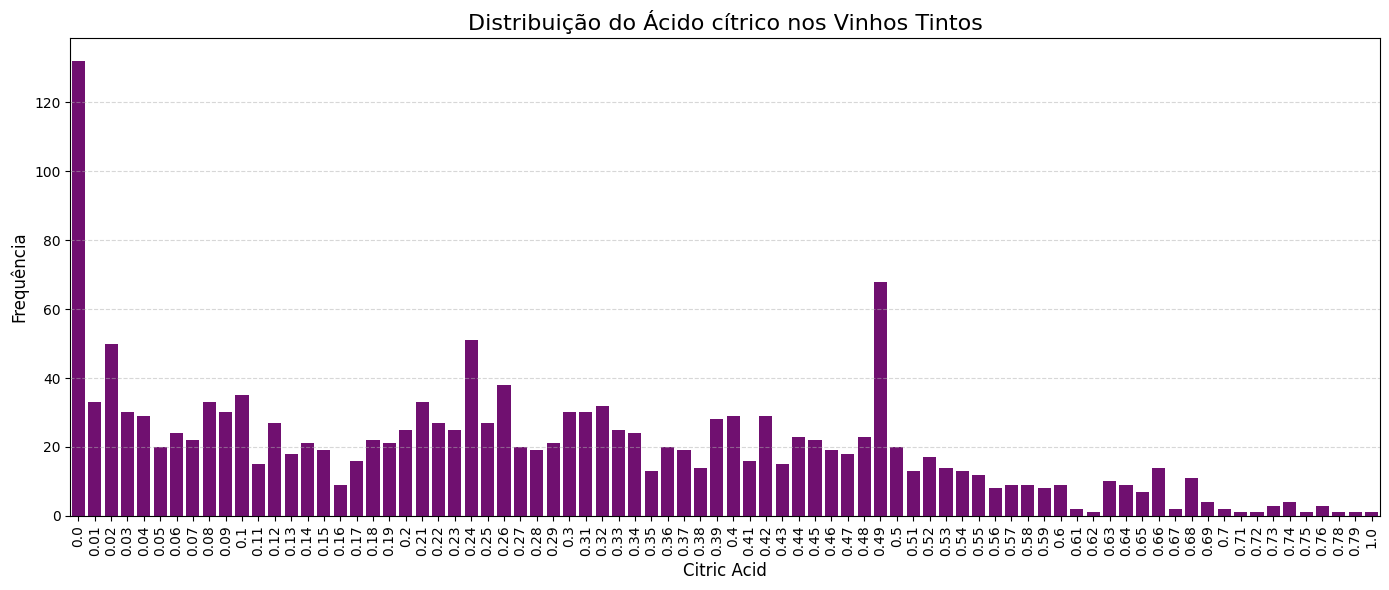

In [73]:
acidez_citrica = dados['citric acid'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=acidez_citrica.index, y=acidez_citrica.values, color='purple')
plt.title('Distribuição do Ácido cítrico nos Vinhos Tintos', fontsize=16)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

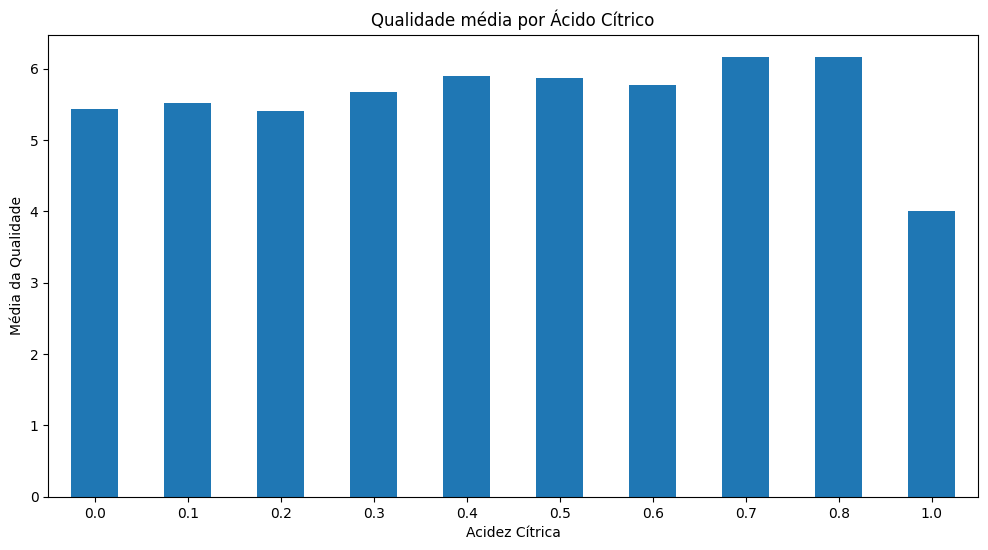

In [188]:
dados["acido_citrico"] = dados["citric acid"].round(1)
acidocitrico_qualidade = dados.groupby("acido_citrico").agg( media_qualidade=("quality", "mean")).reset_index()
acidocitrico_qualidade.plot(x="acido_citrico",y="media_qualidade",kind="bar",title="Qualidade média por Ácido Cítrico",legend=False,figsize=(12, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Acidez Cítrica")
plt.show()

<font style= "color : red">
A análise da distribuição do ácido cítrico nos vinhos tintos revela que a maioria das amostras apresenta valores muito baixos, com destaque para o valor 0,0, indicando que boa parte dos vinhos não possui essa substância em sua composição. Apesar disso, há registros esparsos de concentração entre 0,1 e 0,5, sugerindo uma distribuição relativamente dispersa, porém com predominância de baixos teores.
O gráfico de barras complementa essa análise ao mostrar a qualidade média dos vinhos em cada faixa de ácido cítrico. Nota-se que a qualidade tende a aumentar conforme o nível de ácido cítrico cresce até cerca de 0,7–0,8, atingindo os maiores valores médios de qualidade nessa faixa. No entanto, para o valor mais extremo (1.0), a qualidade média cai consideravelmente, possivelmente por ser uma ocorrência rara e atípica.
</font>

* ### Analisando a variável (residual sugar)

In [66]:
dados["residual sugar"].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [67]:
dados["residual sugar"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: residual sugar
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [68]:
dados["residual sugar"].value_counts()

residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
12.90      1
5.40       1
3.75       1
5.70       1
13.90      1
Name: count, Length: 91, dtype: int64

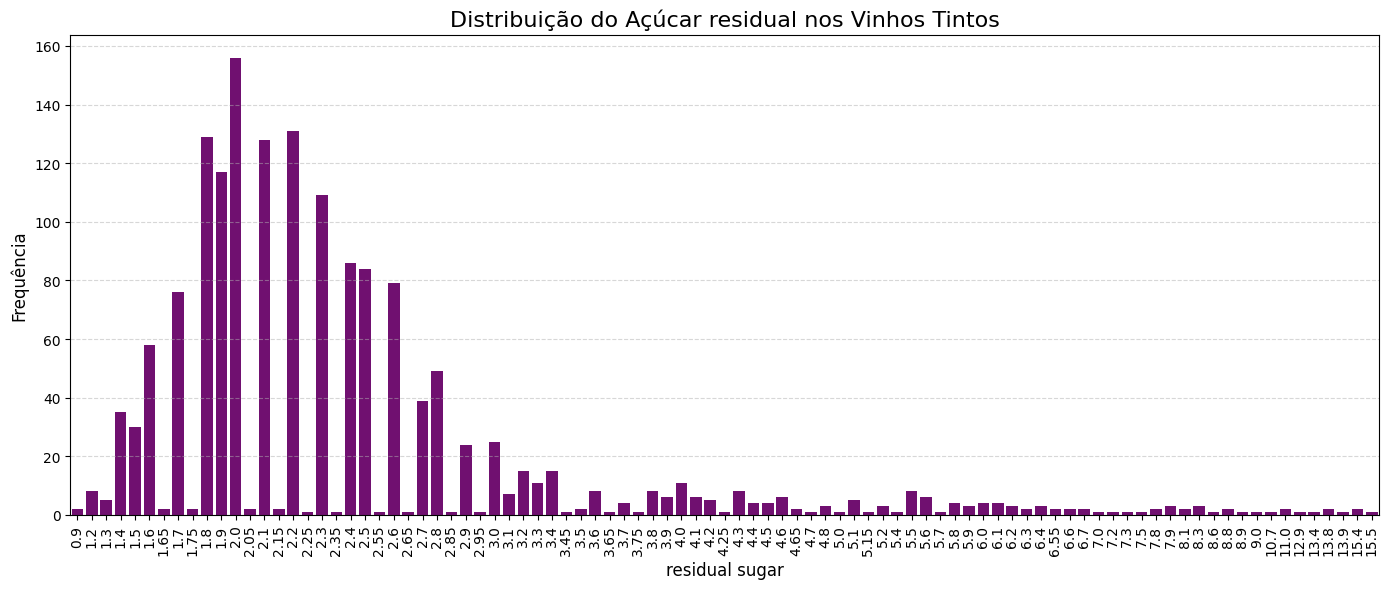

In [75]:
acucar_residual = dados['residual sugar'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=acucar_residual.index, y=acucar_residual.values, color='purple')
plt.title('Distribuição do Açúcar residual nos Vinhos Tintos', fontsize=16)
plt.xlabel('residual sugar', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

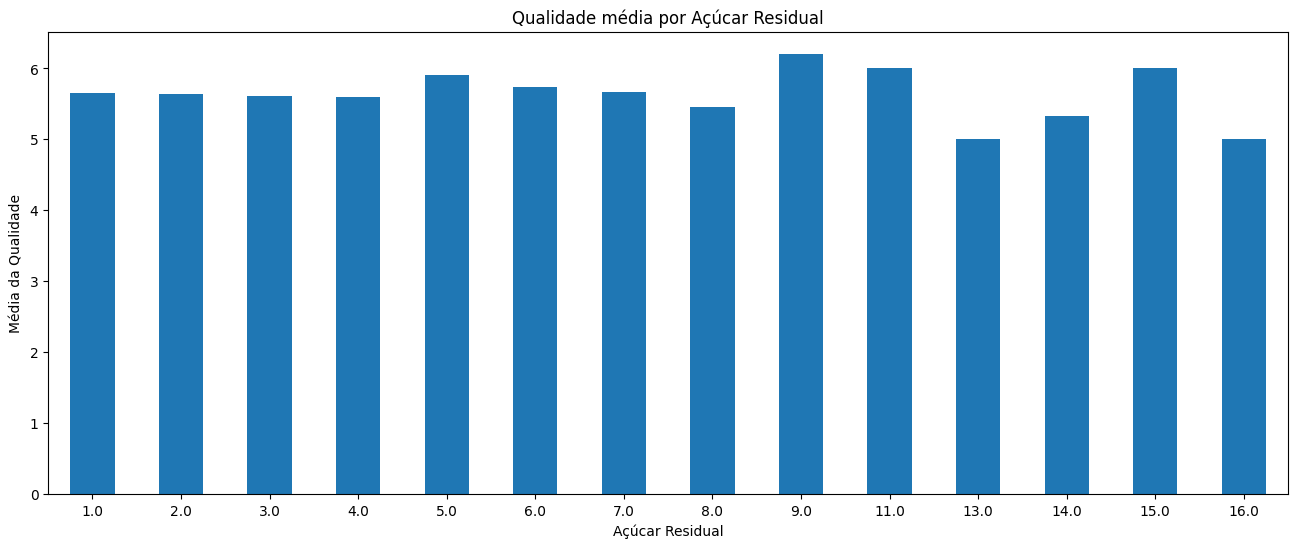

In [189]:
dados["acucar_residual"] = dados["residual sugar"].round(0)
acucar_residual_qualidade = dados.groupby("acucar_residual").agg( media_qualidade=("quality", "mean")).reset_index()
acucar_residual_qualidade.plot(x="acucar_residual",y="media_qualidade",kind="bar",title="Qualidade média por Açúcar Residual",legend=False,figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Açúcar Residual")
plt.show()

<font style="color : red">
A análise da distribuição do açúcar residual nos vinhos tintos mostra uma predominância de valores baixos, com maior concentração em torno de 2,0, seguida por 2,2 e 1,8. Isso indica que a maioria dos vinhos apresenta baixo teor de açúcar residual. A presença de uma cauda longa à direita revela que há poucas amostras com valores mais altos, caracterizando uma distribuição assimétrica.
No gráfico de barras, que mostra a média da qualidade dos vinhos por faixa de açúcar residual, observa-se que a qualidade se mantém relativamente estável nas faixas mais baixas. Em valores mais elevados, há uma leve oscilação, com algumas variações positivas e negativas. No entanto, essas flutuações não demonstram uma tendência clara de impacto direto do açúcar residual sobre a qualidade, sugerindo que, dentro do intervalo analisado, essa variável não exerce influência significativa na percepção média da qualidade dos vinhos.
</font>

* ### Analisando a variável (chlorides)

Chlorides = Cloretos. Em vinhos pode ser a quantidade de sais.

In [76]:
dados["chlorides"].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [77]:
dados["chlorides"].value_counts()

chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.168     1
0.267     1
0.169     1
0.235     1
0.230     1
Name: count, Length: 153, dtype: int64

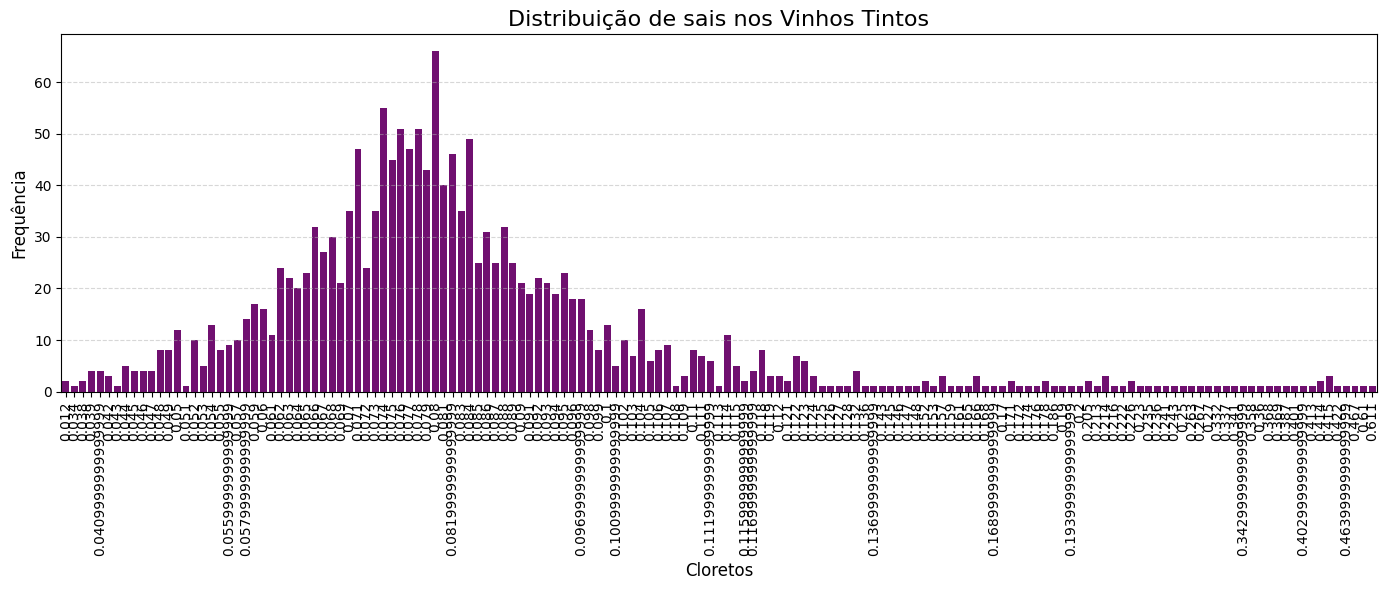

In [87]:
cloretos = dados['chlorides'].value_counts().sort_index().round(2)
plt.figure(figsize=(14, 6))  
sns.barplot(x=cloretos.index, y=cloretos.values, color='purple')
plt.title('Distribuição de sais nos Vinhos Tintos', fontsize=16)
plt.xlabel('Cloretos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

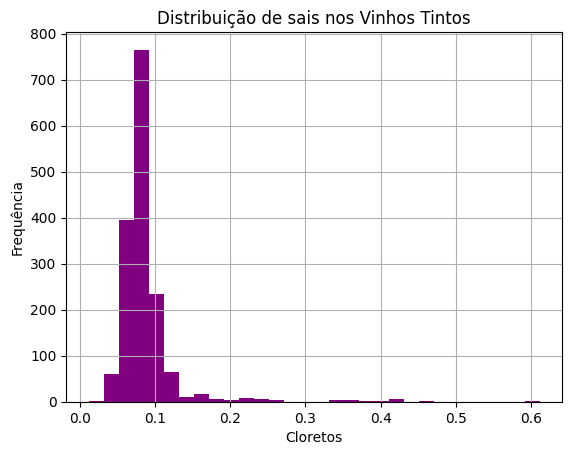

In [196]:
plt.hist(dados['chlorides'], bins=30, color='purple')
plt.xlabel('Cloretos')
plt.ylabel('Frequência')
plt.title('Distribuição de sais nos Vinhos Tintos')
plt.grid(True)
plt.show()

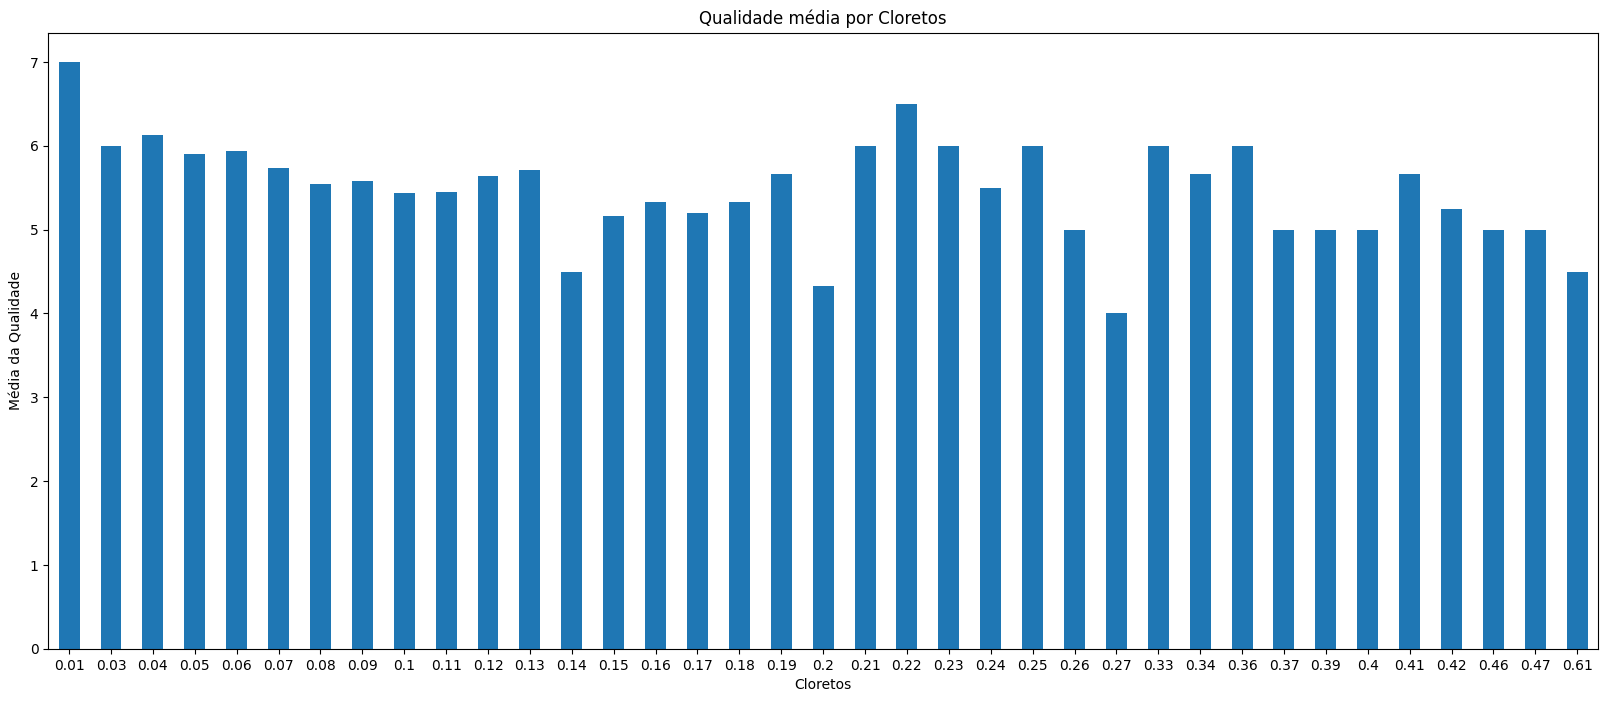

In [193]:
dados["cloretos"] = dados["chlorides"].round(2)
cloretos_qualidade = dados.groupby("cloretos").agg( media_qualidade=("quality", "mean")).reset_index()
cloretos_qualidade.plot(x="cloretos",y="media_qualidade",kind="bar",title="Qualidade média por Cloretos",legend=False,figsize=(20, 8))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Cloretos")
plt.show()

<font style= "color : red">
O primeiro gráfico apresentou poluição visual devido ao grande número de categorias no eixo X. Para melhorar a clareza na visualização, os valores foram agrupados em faixas decimais. Essa abordagem permitiu identificar que a maior concentração de cloretos nos vinhos tintos se encontra na faixa de 0,1. Além disso, observou-se que as maiores médias de qualidade estão associadas a níveis mais baixos de cloretos, especialmente na faixa de 0,01, que apresentou a maior média de qualidade entre todas as faixas analisadas. Isso sugere uma possível relação negativa entre a concentração de cloretos e a qualidade do vinho.
</font>

* ### Analisando a variável (free sulfur dioxide)

In [84]:
dados["free sulfur dioxide"].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

In [85]:
dados["free sulfur dioxide"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: free sulfur dioxide
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [86]:
dados["free sulfur dioxide"].value_counts()

free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
23.0     32
26.0     32
20.0     30
27.0     29
25.0     24
28.0     23
29.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
33.0     11
36.0     11
38.0      9
41.0      7
40.0      6
39.0      5
51.0      4
48.0      4
45.0      3
52.0      3
37.0      3
42.0      3
1.0       3
43.0      3
50.0      2
68.0      2
55.0      2
37.5      2
40.5      1
47.0      1
2.0       1
46.0      1
54.0      1
5.5       1
57.0      1
53.0      1
72.0      1
66.0      1
Name: count, dtype: int64

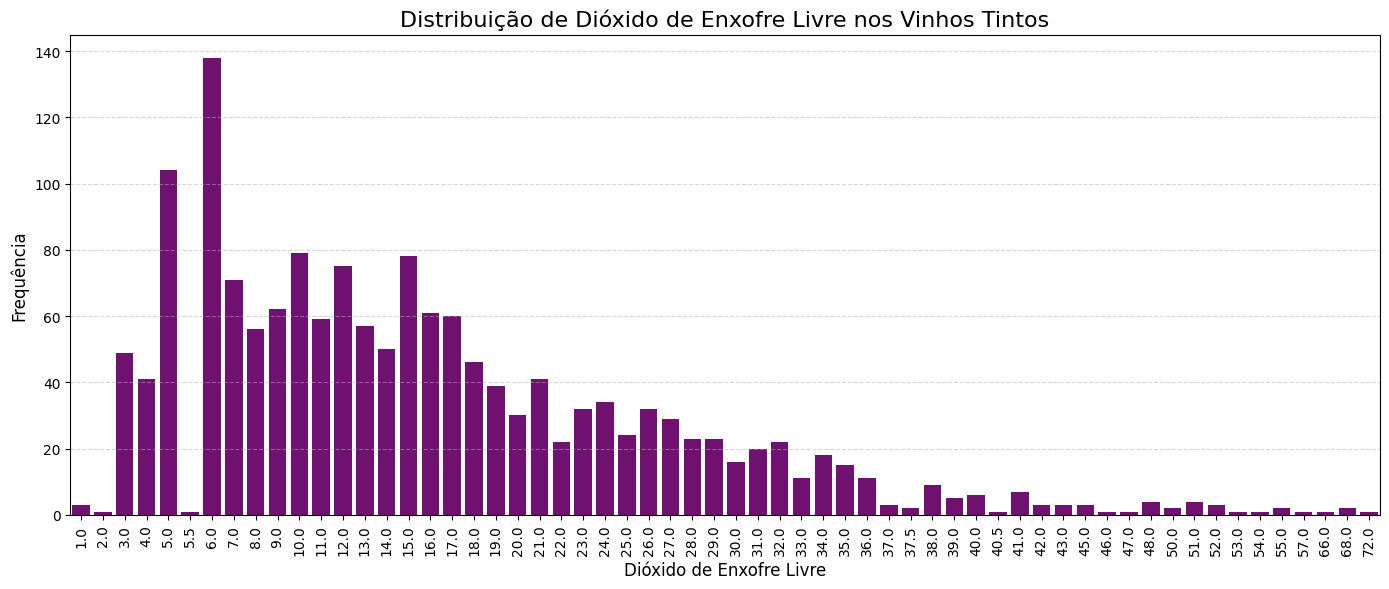

In [88]:
dioxido_enxofre_livre = dados['free sulfur dioxide'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=dioxido_enxofre_livre.index, y=dioxido_enxofre_livre.values, color='purple')
plt.title('Distribuição de Dióxido de Enxofre Livre nos Vinhos Tintos', fontsize=16)
plt.xlabel('Dióxido de Enxofre Livre', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

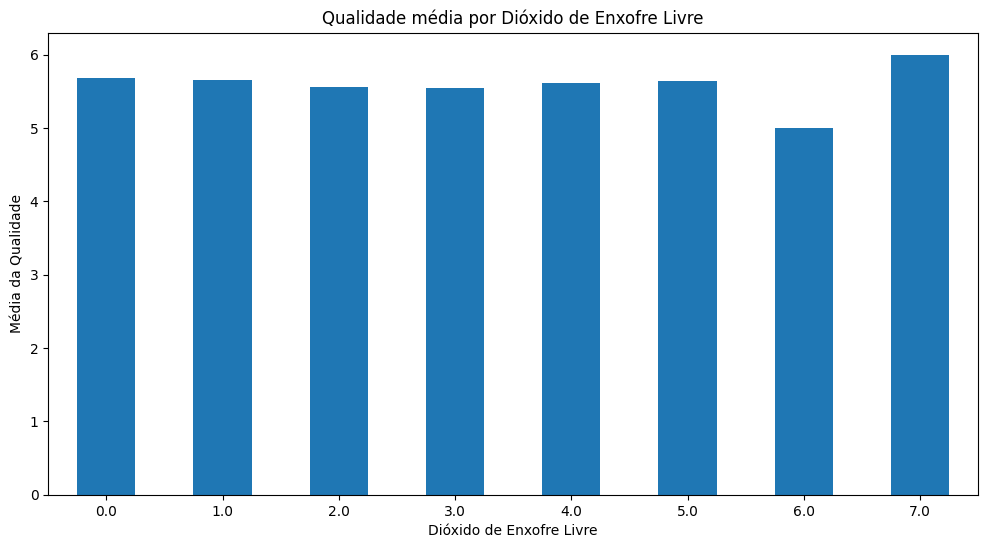

In [194]:
dados["dioxido_enxofre_livre"] = (dados["free sulfur dioxide"]//10)
dioxido_enxofre_livre_qualidade = dados.groupby("dioxido_enxofre_livre").agg( media_qualidade=("quality", "mean")).reset_index()
dioxido_enxofre_livre_qualidade.plot(x="dioxido_enxofre_livre",y="media_qualidade",kind="bar",title="Qualidade média por Dióxido de Enxofre Livre",legend=False,figsize=(12, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Dióxido de Enxofre Livre")
plt.show()

* <font style = "color : red">
Após anánlise dos gráficos acima podemos dizer que a maior concentração de Dióxido de Enxofre livre é de 6.0 em que chega a aproximadamente a 140 unidades. Também é valido ressaltar que 1.0, 2.0, 5.5 e acima de 37.0 a frequência de vinhos com essas quantidades de dióxido de enxofre livre é quase nula.
Além disso, ao analisar o gráfico da concentração de Dióxido de Enxofre livre com a qualidade, vimos que a maior qualidade é a que tem maior concentração de dióxido de enxofre livre, ou seja a concentração de 7. Para esse gráfico usamos a técnica discretização ou binning, em que consiste em dividir os valores por 10 sem deixar resto para uma melhor visualização do gráfico, dessa forma : 
* 0 (0 a 9)
* 1 (10 a 19)
* 2 (20 a 29)
* e assim por diante...
</font>

* ### Analisando a variável (total sulfur dioxide)

In [90]:
dados["total sulfur dioxide"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: total sulfur dioxide
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [91]:
dados["total sulfur dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [92]:
dados["total sulfur dioxide"].value_counts()

total sulfur dioxide
28.0     43
24.0     36
18.0     35
15.0     35
23.0     34
         ..
152.0     1
139.0     1
278.0     1
160.0     1
289.0     1
Name: count, Length: 144, dtype: int64

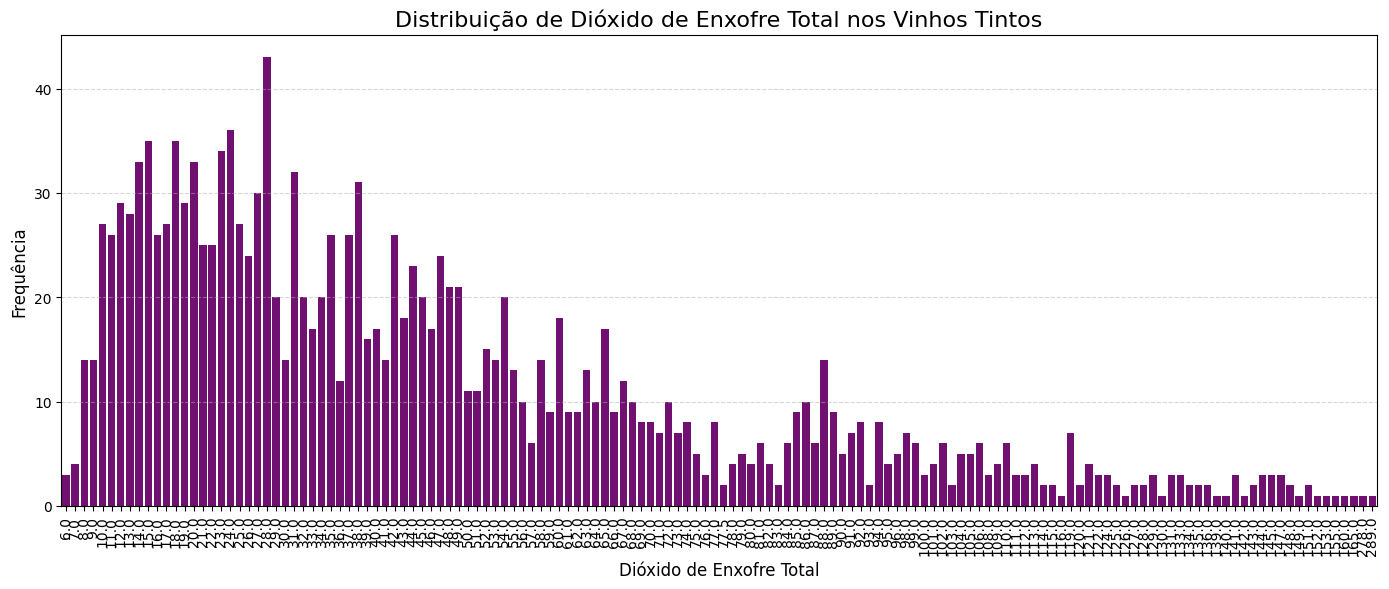

In [103]:
dioxido_enxofre_total = dados['total sulfur dioxide'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=dioxido_enxofre_total.index, y=dioxido_enxofre_total.values, color='purple')
plt.title('Distribuição de Dióxido de Enxofre Total nos Vinhos Tintos', fontsize=16)
plt.xlabel('Dióxido de Enxofre Total', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

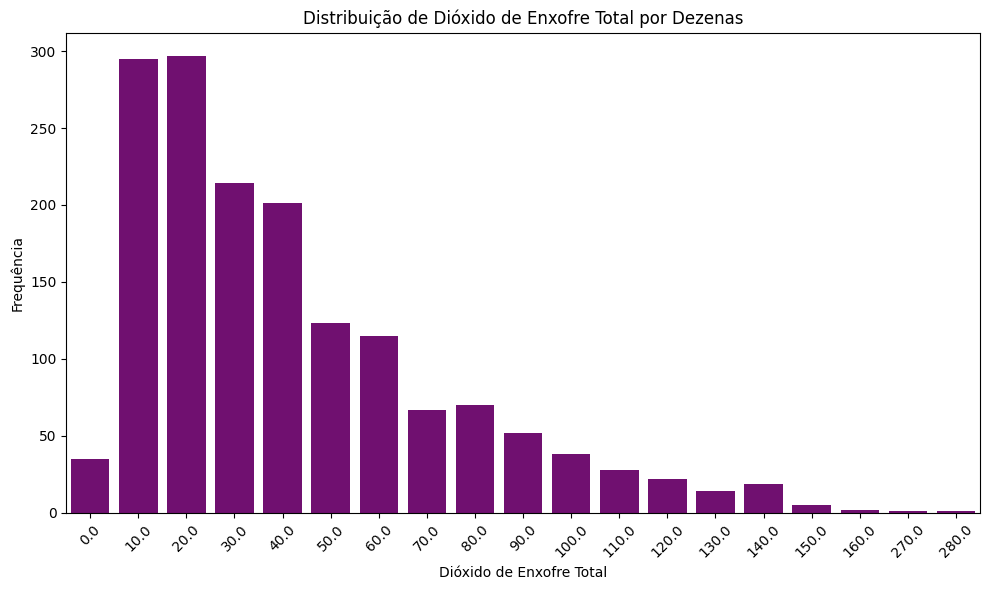

In [98]:
dados['dioxidoenxofretotaldezena'] = (dados['total sulfur dioxide'] // 10) * 10

# Agrupar por essa nova coluna e contar a frequência
frequencia = dados['dioxidoenxofretotaldezena'].value_counts().sort_index().reset_index()
frequencia.columns = ['dioxidoenxofretotaldezena', 'frequencia']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=frequencia, x="dioxidoenxofretotaldezena", y="frequencia", color="purple")
plt.title("Distribuição de Dióxido de Enxofre Total por Dezenas")
plt.xlabel("Dióxido de Enxofre Total")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

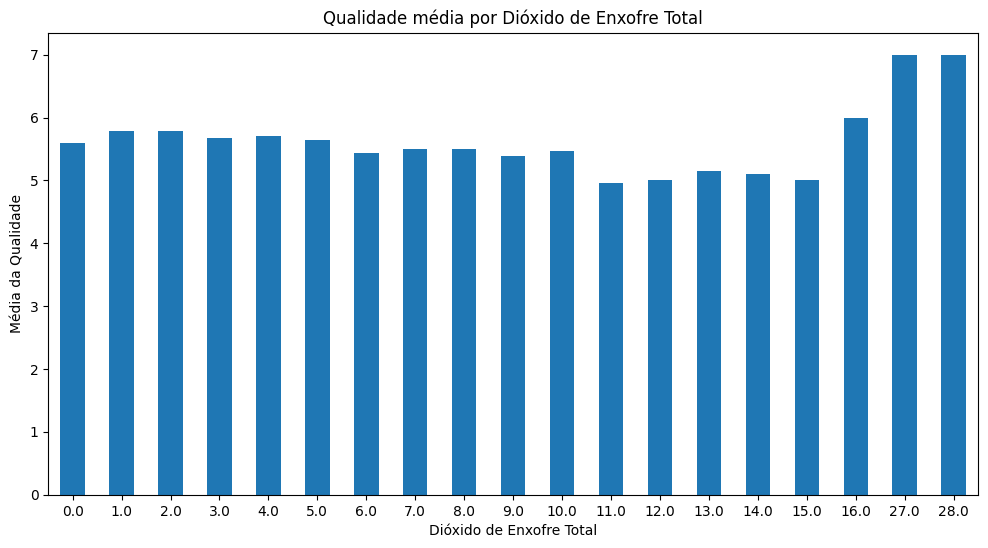

In [206]:
dados["dioxido_enxofre_total"] = (dados["total sulfur dioxide"]//10)
dioxido_enxofre_total_qualidade = dados.groupby("dioxido_enxofre_total").agg( media_qualidade=("quality", "mean")).reset_index()
dioxido_enxofre_total_qualidade.plot(x="dioxido_enxofre_total",y="media_qualidade",kind="bar",title="Qualidade média por Dióxido de Enxofre Total",legend=False,figsize=(12, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Dióxido de Enxofre Total")
plt.show()

<font style = "color : red">
Acima podemos ver o primeiro gráfico de Dióxido de Enxofre total bem poluído, dessa forma foi preferível separar a quantidade de dióxido de dez em dez, utilizando a técnica de discretização ou binning, que seria a criação de faixas, assim conseguimos analisar que 10 e 20 são as maiores concentrações de Dióxido de Enxofre total e podemos afirmar que esses valores vão diminuido a frequência conforme a concentração de dióxido vai aumentando.
Após analisar o gráfico de qualidade média por concentração de dióxido de enxofre total podemos concluir que as maiores concentrações 27 e 28 tem a maior média de qualidade, dessa forma podemos dizer que a concentração desse dióxido é diretamente proporcional a qualidade do vinho.
</font>

* ### Analisando a variável (density)

In [100]:
dados["density"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: density
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [101]:
dados["density"].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

In [102]:
dados["density"].value_counts()

density
0.99720    36
0.99760    35
0.99680    35
0.99800    29
0.99620    28
           ..
0.99474     1
0.99483     1
0.99314     1
0.99380     1
0.99651     1
Name: count, Length: 436, dtype: int64

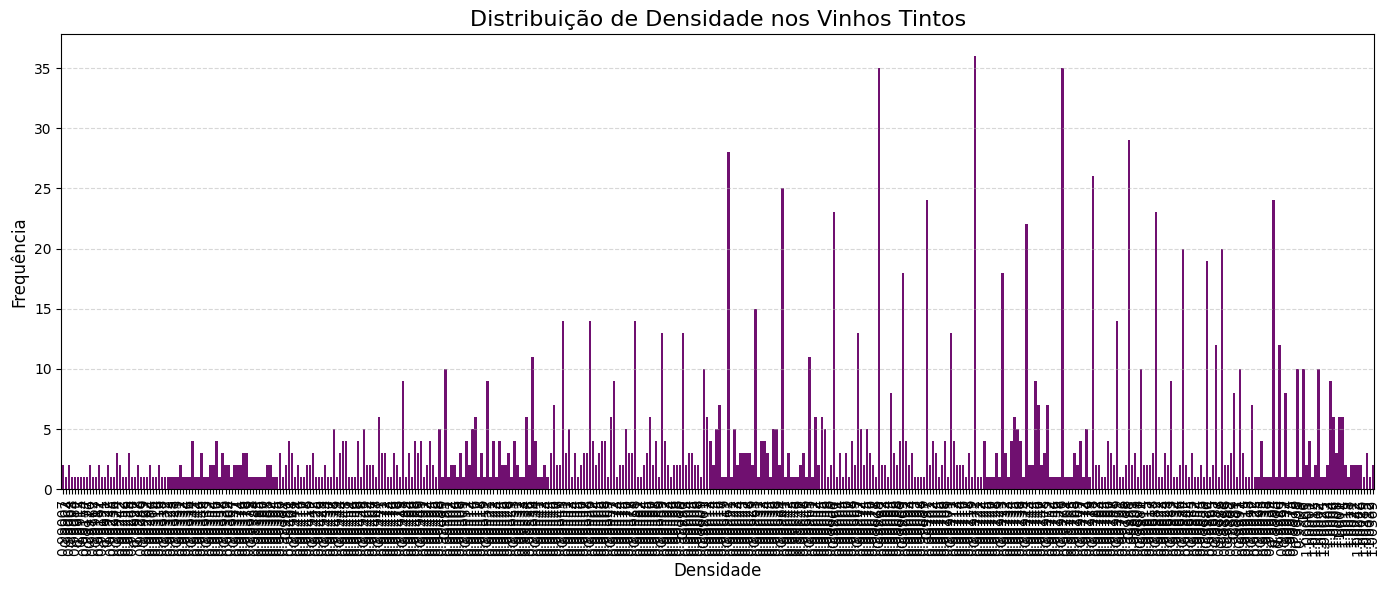

In [116]:
densidade = dados['density'].value_counts().sort_index().round(3)
plt.figure(figsize=(14, 6))  
sns.barplot(x=densidade.index, y=densidade.values, color='purple')
plt.title('Distribuição de Densidade nos Vinhos Tintos', fontsize=16)
plt.xlabel('Densidade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

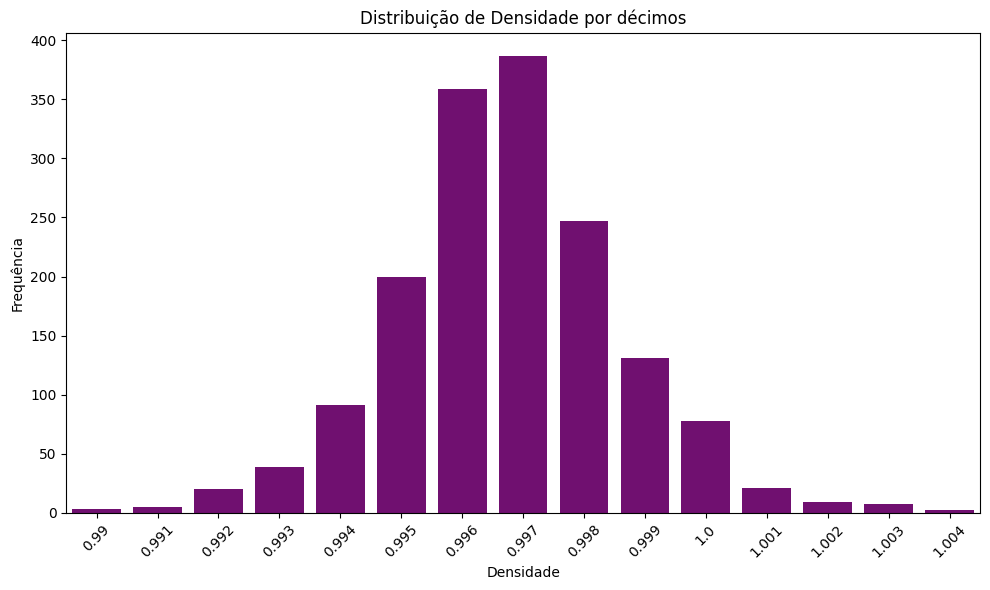

In [207]:
dados['densidade_decimal'] = (dados['density']).round(3)
densidade_por_decimo = dados['densidade_decimal'].value_counts().sort_index().reset_index()
densidade_por_decimo.columns = ['densidade_decimal', 'frequencia']
plt.figure(figsize=(10, 6))
sns.barplot(data=densidade_por_decimo, x="densidade_decimal", y="frequencia", color="purple")
plt.title("Distribuição de Densidade por décimos")
plt.xlabel("Densidade")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

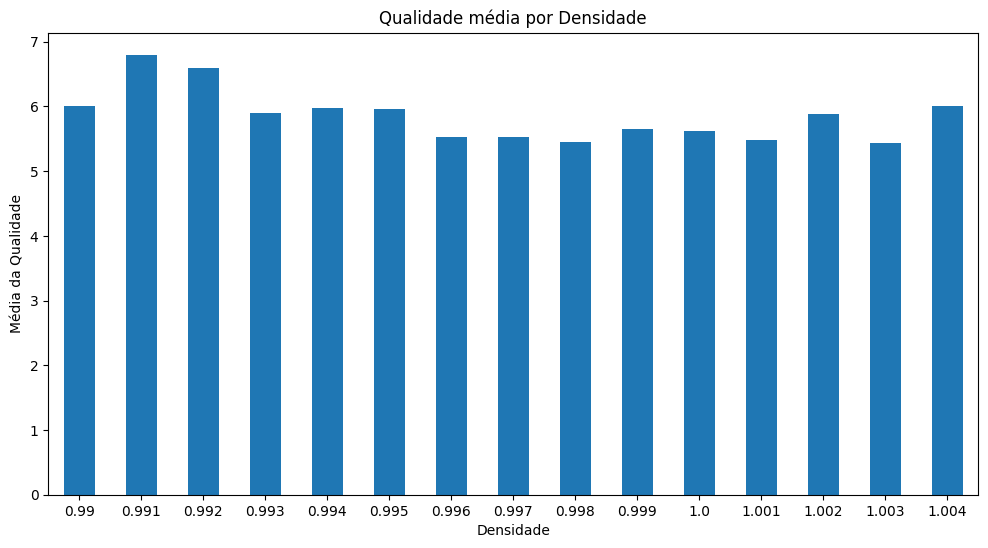

In [211]:
dados["densidade"] = (dados["density"]).round(3)
densidade_qualidade = dados.groupby("densidade").agg( media_qualidade=("quality", "mean")).reset_index()
densidade_qualidade.plot(x="densidade",y="media_qualidade",kind="bar",title="Qualidade média por Densidade",legend=False,figsize=(12, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Densidade")
plt.show()

<font style = "color : red">
Após a análise dos gráficos, observa-se que o primeiro apresenta poluição visual devido ao excesso de casas decimais no eixo X. Para facilitar a interpretação, optou-se por arredondar os valores de densidade para três casas decimais. Com essa abordagem, foi possível identificar que as densidades mais frequentes nos vinhos tintos estão em torno de 0,996 e 0,997. Por outro lado, as faixas entre 0,990 a 0,992 e 1,001 a 1,004 apresentam baixa frequência, indicando que são menos comuns na amostra. De forma geral, conclui-se que a maioria dos vinhos possui densidade entre 0,995 e 0,999.
Além disso, ao analisar o gráfico de média de qualidade por densidade, verifica-se que os vinhos com densidade de 0,991 e 0,992 apresentam as maiores médias de qualidade, sugerindo uma possível relação entre densidades mais baixas e maior qualidade percebida.
</font>

* ### Analisando a variável (pH)

In [113]:
dados["pH"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: pH
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [114]:
dados["pH"].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [115]:
dados["pH"].value_counts()

pH
3.30    57
3.36    56
3.26    53
3.39    48
3.38    48
        ..
2.86     1
2.87     1
3.74     1
3.70     1
2.90     1
Name: count, Length: 89, dtype: int64

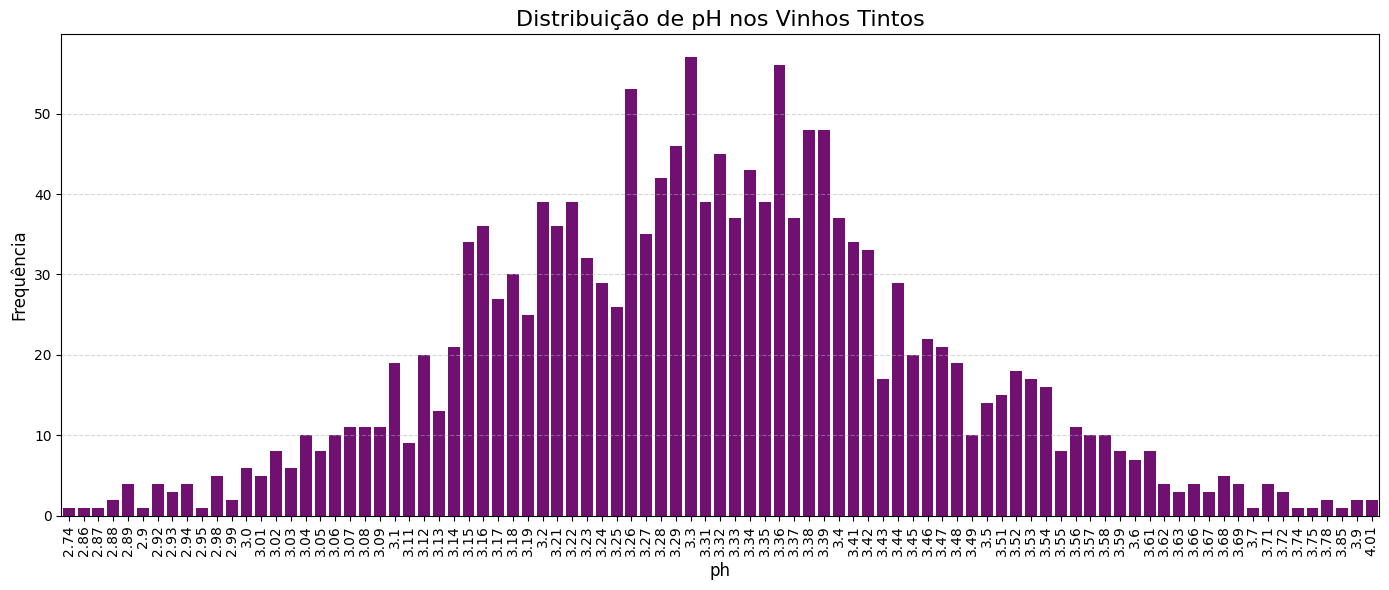

In [123]:
ph = dados['pH'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=ph.index, y=ph.values, color='purple')
plt.title('Distribuição de pH nos Vinhos Tintos', fontsize=16)
plt.xlabel('ph', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

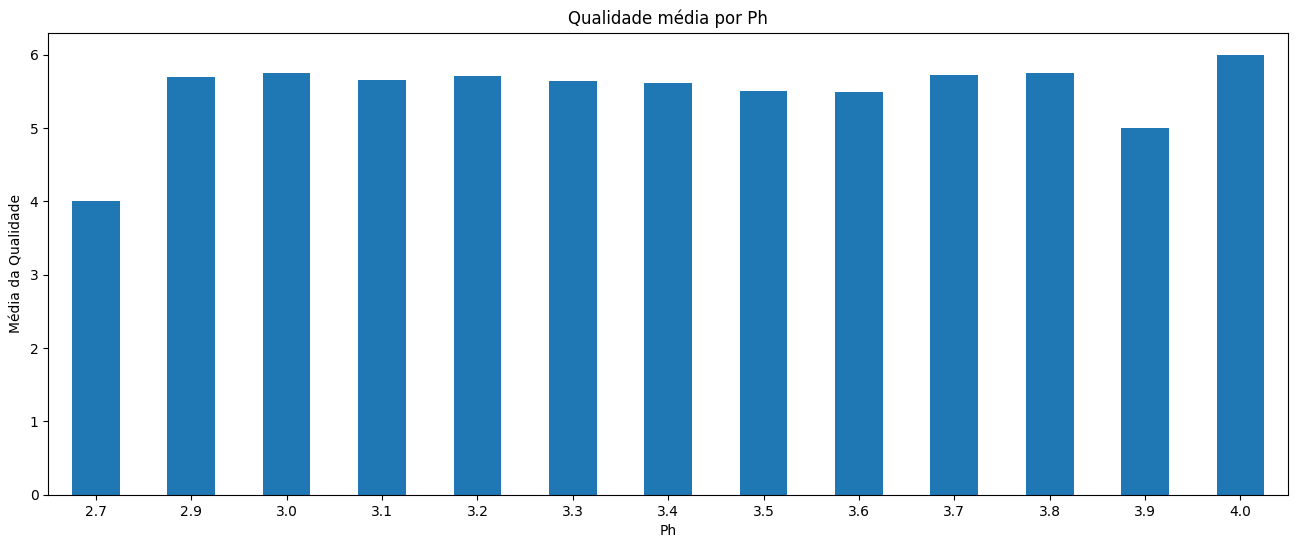

In [219]:
dados["ph"] = dados["pH"].round(1)
ph_qualidade = dados.groupby("ph").agg( media_qualidade=("quality", "mean")).reset_index()
ph_qualidade.plot(x="ph",y="media_qualidade",kind="bar",title="Qualidade média por Ph",legend=False,figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel("Média da Qualidade")
plt.xlabel("Ph")
plt.show()

<font style = "color : red">
A análise da distribuição de pH nos vinhos tintos revela uma maior concentração de valores na faixa entre 3,2 e 3,4, representando o pico de frequência da amostra. Isso indica que a maioria dos vinhos tintos analisados possui pH dentro desse intervalo, o que está de acordo com a faixa considerada ideal para esse tipo de vinho.
Valores de pH mais baixos (abaixo de 3,0), que indicam maior acidez, são menos frequentes, assim como valores mais altos (acima de 3,6), que correspondem a vinhos menos ácidos.
Além disso, ao analisar o gráfico de média de qualidade por pH, observa-se que a maior média de qualidade está associada ao pH 4,0. Segundo estudos, vinhos com pH um pouco mais elevado tendem a apresentar um perfil mais macio e agradável ao paladar, o que pode explicar a melhor avaliação de qualidade nessa faixa.
</font>

* ### Analisando a variável (sulphates)

In [119]:
dados["sulphates"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: sulphates
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [120]:
dados["sulphates"].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [121]:
dados["sulphates"].value_counts()

sulphates
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.16     1
1.34     1
1.15     1
1.33     1
1.01     1
Name: count, Length: 96, dtype: int64

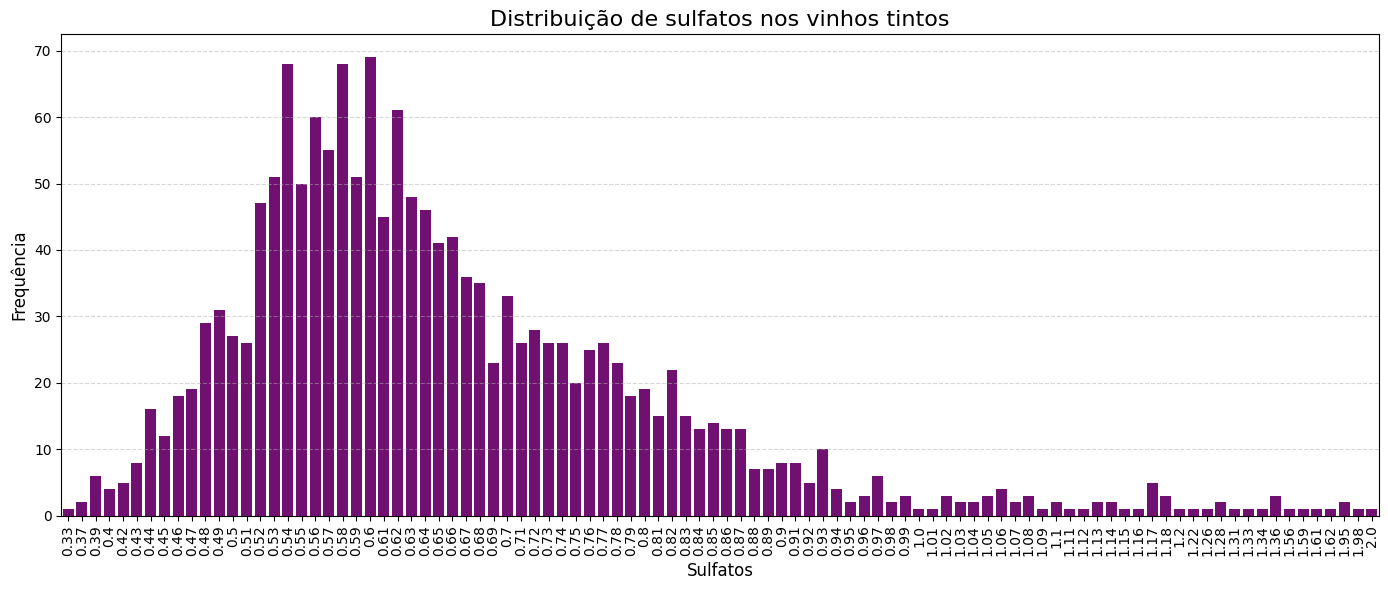

In [224]:
sulfatos = dados['sulphates'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=sulfatos.index, y=sulfatos.values, color='purple')
plt.title('Distribuição de sulfatos nos vinhos tintos', fontsize=16)
plt.xlabel('Sulfatos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

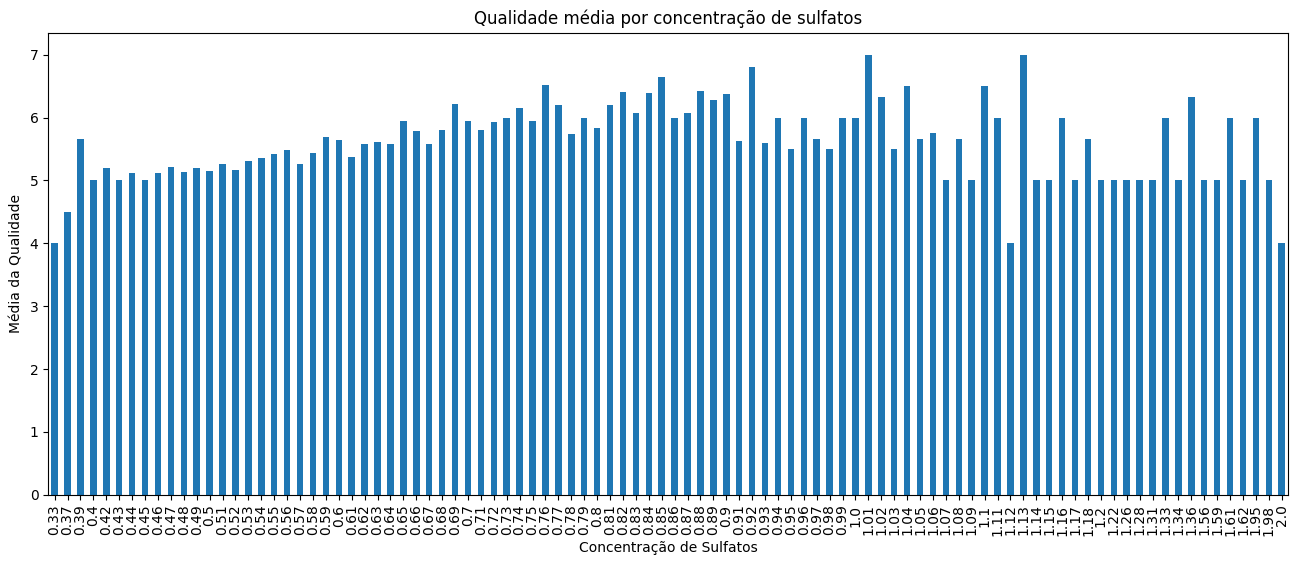

In [230]:
dados["sulfatos"] = dados["sulphates"].round(2)
sulfatos_qualidade = dados.groupby("sulfatos").agg( media_qualidade=("quality", "mean")).reset_index()
sulfatos_qualidade.plot(x="sulfatos",y="media_qualidade",kind="bar",title="Qualidade média por concentração de sulfatos",legend=False,figsize=(16, 6))
plt.xticks(rotation=90)
plt.ylabel("Média da Qualidade")
plt.xlabel("Concentração de Sulfatos")
plt.show()

<font style = "color : red">
O gráfico mostra a distribuição da concentração de sulfatos nos vinhos tintos analisados. A maior parte das amostras apresenta níveis de sulfato entre 0,50 e 0,70 , com um pico claro de frequência próximo a 0,60.
Já quando analisamos o gráfico de qualidade média por concentração de sulfatos vimos que o maior nível de qualidade são os vinhos que possuem uma concentração de sulfatos na faixa de 1.01 e 1.13.
</font>

* ### Analisando a variável (alcohol)

In [125]:
dados["alcohol"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: alcohol
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [126]:
dados["alcohol"].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [127]:
dados["alcohol"].value_counts()

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64

C:\Users\lmr_b\AppData\Local\Temp\ipykernel_5352\584565552.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{x:.1f}" for x in alcool.index])


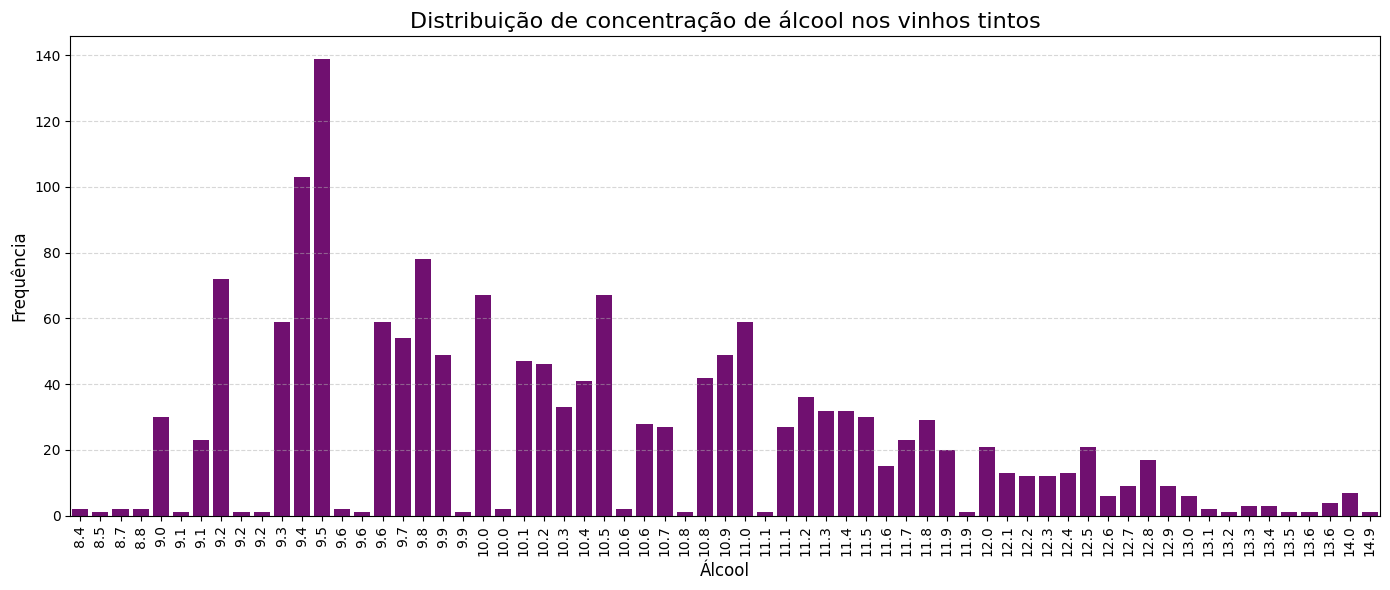

In [234]:
alcool = dados['alcohol'].value_counts().sort_index()
plt.figure(figsize=(14, 6))  
sns.barplot(x=alcool.index, y=alcool.values, color='purple')
plt.title('Distribuição de concentração de álcool nos vinhos tintos', fontsize=16)
plt.xlabel('Álcool', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)  
plt.gca().set_xticklabels([f"{x:.1f}" for x in alcool.index])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

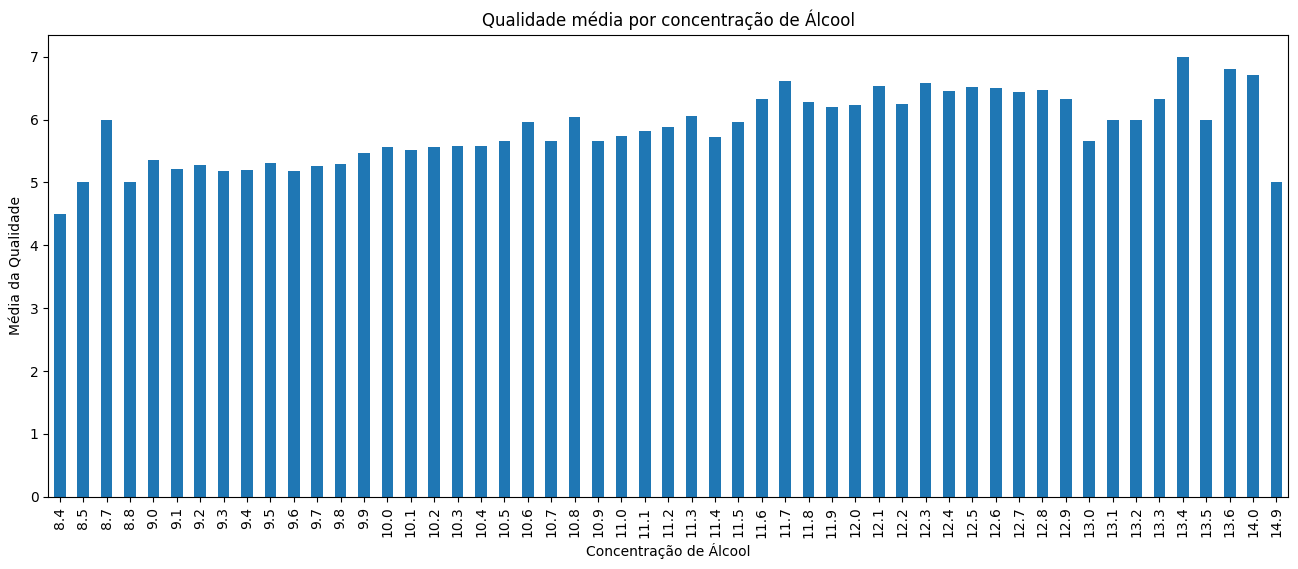

In [228]:
dados["alcool"] = dados["alcohol"].round(1)
alcool_qualidade = dados.groupby("alcool").agg( media_qualidade=("quality", "mean")).reset_index()
alcool_qualidade.plot(x="alcool",y="media_qualidade",kind="bar",title="Qualidade média por concentração de Álcool",legend=False,figsize=(16, 6))
plt.xticks(rotation=90)
plt.ylabel("Média da Qualidade")
plt.xlabel("Concentração de Álcool")
plt.show()

<font style = "color : red">
O gráfico mostra a distribuição da concentração de álcool nos vinhos tintos analisados. A maior parte das amostras apresenta níveis de álcool entre 9,3 e 9,5, com um pico claro de frequência próximo a 9,5, indicando que cerca de 140 vinhos possuem essa faixa de teor alcoólico. Isso evidencia que a maioria dos vinhos na amostra tende a ter um teor alcoólico moderado.
Complementando essa análise, o gráfico de média de qualidade por concentração de álcool revela uma tendência de aumento na qualidade média à medida que o teor alcoólico cresce. Notavelmente, os vinhos com níveis de álcool entre 12,0 e 13,5 apresentam as maiores médias de qualidade, algumas ultrapassando 7,0 pontos na escala da qualidade média. Por outro lado, os vinhos com menor teor alcoólico (abaixo de 9,0) tendem a ter médias de qualidade mais baixas, próximas de 4,5 a 5,5.
Esses dados sugerem uma possível relação positiva entre o teor alcoólico e a percepção de qualidade dos vinhos tintos analisados.
</font>

# 5. Preparação e tratamento dos dados


In [235]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.7,0.0,2.0,0.08,1.0,3.0,0.998,3.5,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.9,0.0,3.0,0.10,2.0,6.0,0.997,3.2,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.8,0.0,2.0,0.09,1.0,5.0,0.997,3.3,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.3,0.6,2.0,0.08,1.0,6.0,0.998,3.2,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.7,0.0,2.0,0.08,1.0,3.0,0.998,3.5,0.56,9.4


In [238]:
dados_numerico = dados.drop(columns = ['fixed_acidity_arred','densidade_decimal','dioxidoenxofretotaldezena','acidez_volatil','acido_citrico','acucar_residual','cloretos','dioxido_enxofre_livre','dioxido_enxofre_total','densidade','ph','sulfatos','alcool'])
corr = dados_numerico.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


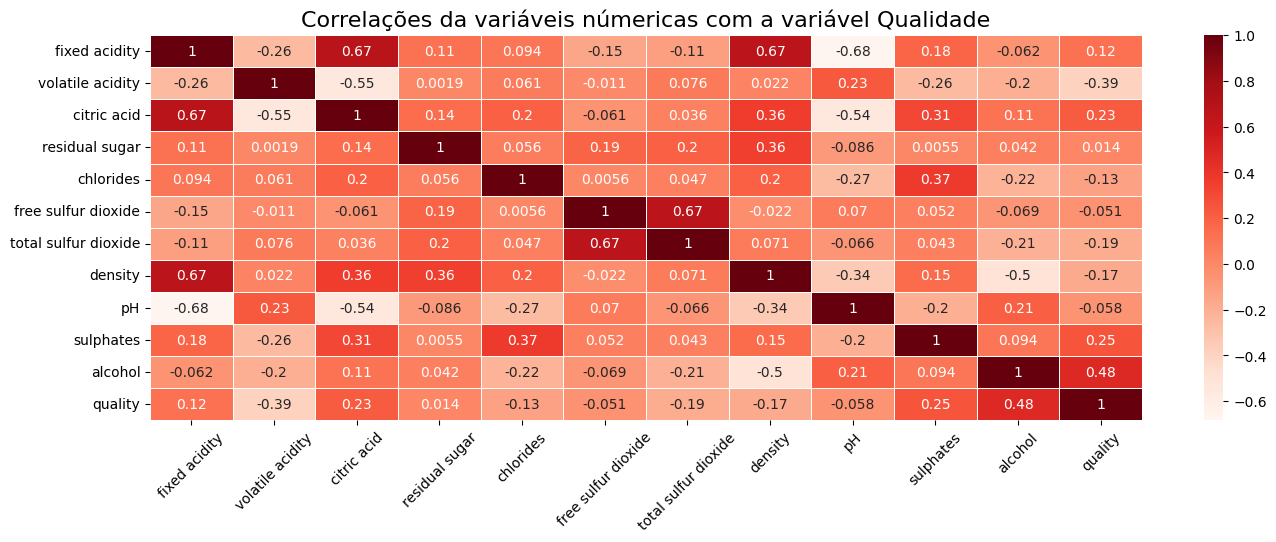

In [244]:
heatmap = sns.heatmap(corr, annot = True, linewidth = 0.5, cmap = 'Reds')
heatmap.figure.set_size_inches(16,5)
heatmap.set_title('Correlações da variáveis númericas com a variável Qualidade', fontsize = 16);
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45);

 <font style = "color : red">

#### A partir do heatmap de correlação, percebe-se que as variáveis numéricas independentes que apresentam maior relação com a variável alvo são:

*  fixed acidity ▶ 0,12
*  citric acid ▶ 0,23
*  residual sugar ▶ 0,014
*  sulphates ▶ 0,25
*  alcohol ▶ 0,48

</font>


# 6. Construção de modelo de classificação da qualidade dos vinhos


In [247]:
dados_numerico.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [290]:
dados_numerico['quality_bin'] = dados_numerico['quality'].apply(lambda x: "good" if x>5 else "bad")
dados_numerico['quality_bin'].value_counts(normalize=True)
dados_numerico.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [297]:
dados_numerico['quality_bin_label'] = dados_numerico['quality_bin']
dados_numerico['quality_bin'] = dados_numerico['quality_bin'].map({'bad': 0, 'good': 1})

<font style = "color : green">

A variável quality, originalmente disponível como uma escala variando de 3 a 8, representa a nota atribuída à qualidade sensorial dos vinhos com base em testes laboratoriais e degustações. Para fins de modelagem de classificação, optou-se por transformar essa variável em um formato binário, com o objetivo de simplificar o problema e melhorar o desempenho dos algoritmos aplicados.
Nesse processo, definiu-se que amostras com notas superiores a 5 seriam classificadas como '1' (bom), enquanto notas iguais ou inferiores a 5 seriam rotuladas como '0' (ruim). Essa escolha foi motivada pela necessidade de separar os vinhos com avaliações positivas daqueles com desempenho inferior na escala de qualidade, possibilitando uma modelagem mais clara entre classes distintas.

</font>

In [313]:
X = dados_numerico.drop(['quality', 'quality_bin','quality_bin_label'], axis=1)
y = dados_numerico['quality_bin']

In [316]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

* ## Modelo DummyClassifier

In [317]:
from sklearn.dummy import DummyClassifier

In [318]:
dummy = DummyClassifier()
dummy.fit(X_treino,y_treino)

dummy.score(X_teste,y_teste)

0.5354166666666667

<font style = "color : red">

##### O modelo obteve uma acurácia de 53,5%, o que representa nossa linha de base (baseline). A partir disso, os modelos seguintes devem superar esse desempenho para serem considerados mais eficazes.

<font style = "color : red">

* ## Modelo de Árvore de Decisão

In [319]:
from sklearn.tree import DecisionTreeClassifier

In [328]:
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_treino , y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [321]:
arvore.predict(X_teste)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [322]:
arvore.score(X_teste , y_teste)

0.7791666666666667

In [323]:
from sklearn.tree import plot_tree

In [324]:
print(dados_numerico.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_bin',
       'quality_bin_label'],
      dtype='object')


In [325]:
nome_colunas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'quality', 'quality_bin',
                'quality_bin_label']

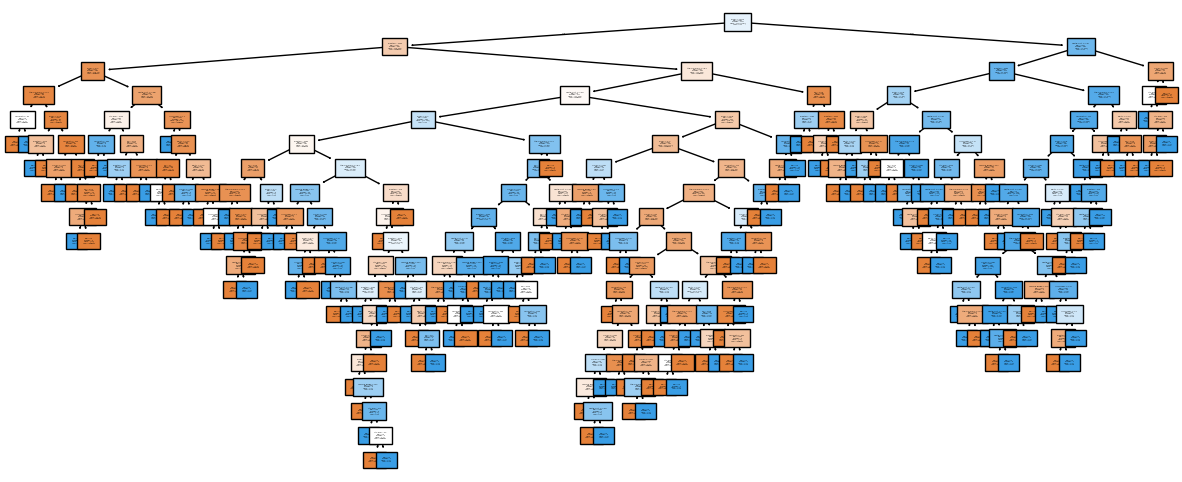

In [326]:
plt.figure(figsize = (15 , 6))
plot_tree(arvore, filled = True, class_names = ['mediano', 'bom'], fontsize = 1, feature_names = nome_colunas);

In [327]:
arvore.score(X_treino,y_treino)

1.0

<font style = "color : red">

##### Apesar do modelo de árvore de decisão ter alcançado uma acurácia de 77,99% nos dados de teste superando a baseline de 53,5% do modelo dummy ao avaliarmos seu desempenho nos dados de treino, observamos uma acurácia de 100%. Esse resultado indica que o modelo está superajustado (overfitting), ou seja, ele memorizou os exemplos do conjunto de treino em vez de aprender padrões generalizáveis. Isso compromete sua capacidade de fazer previsões corretas em dados novos, vamos realizar uma limitação da profundidade (poda na árvore).

</font>

In [330]:
arvore = DecisionTreeClassifier(max_depth = 3 ,random_state=42)
arvore.fit(X_treino , y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [331]:
arvore.score(X_treino, y_treino)

0.7024128686327078

In [332]:
arvore.score(X_teste, y_teste)

0.69375

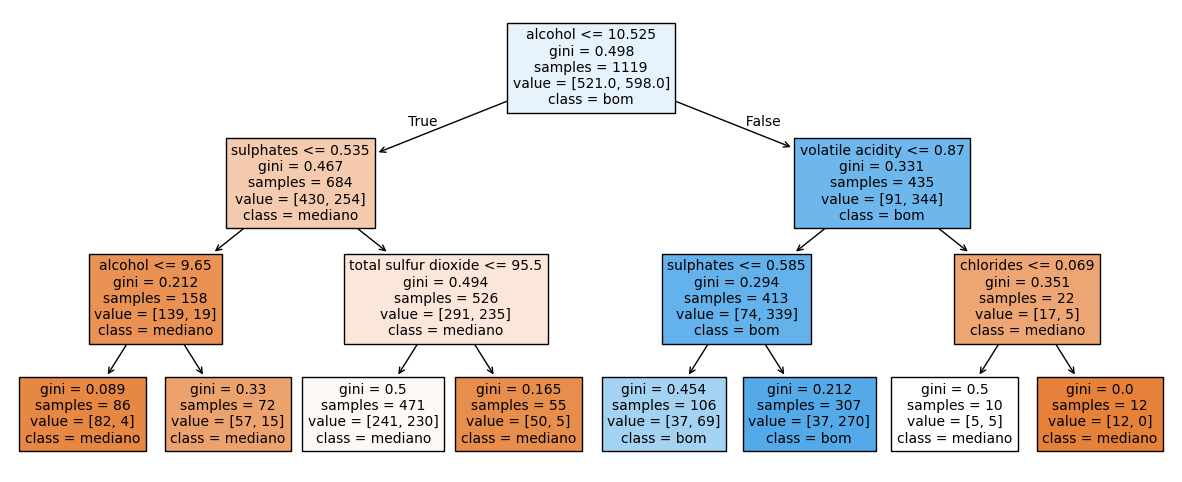

In [335]:
plt.figure(figsize = (15 , 6))
plot_tree(arvore, filled = True, class_names = ['mediano', 'bom'], fontsize = 10, feature_names = nome_colunas);

<font style = "color : red">

##### Após a aplicação da poda na árvore de decisão uma técnica utilizada para reduzir o overfitting observou-se uma queda na acurácia do modelo nos dados de treino, que passou de 100% para 70,2%. Essa redução é esperada, já que o modelo deixa de memorizar os dados para aprender padrões mais generalizáveis. Como resultado positivo, a acurácia no conjunto de teste se manteve próxima, atingindo 69,4%, o que representa um modelo mais equilibrado e com melhor capacidade de generalização. Esse ajuste mostra que, mesmo com uma leve perda de desempenho, o modelo tornou-se mais confiável para fazer previsões em dados não vistos.

</font>

* ### Modelo KNN

In [336]:
from sklearn.preprocessing import MinMaxScaler

In [337]:
normalizacao = MinMaxScaler()
X_treino_normalizado = normalizacao.fit_transform(X_treino)

In [338]:
pd.DataFrame(X_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10
0,0.300885,0.407534,0.278481,0.095890,0.105175,0.169014,0.262411,0.500000,0.330435,0.105590,0.169231
1,0.415929,0.184932,0.506329,0.116438,0.101836,0.126761,0.067376,0.611601,0.417391,0.236025,0.276923
2,0.176991,0.465753,0.037975,0.472603,0.111853,0.070423,0.017730,0.457416,0.573913,0.080745,0.584615
3,0.380531,0.517123,0.164557,0.174658,0.126878,0.042254,0.024823,0.685022,0.504348,0.093168,0.476923
4,0.221239,0.386986,0.443038,0.075342,0.126878,0.112676,0.301418,0.457416,0.365217,0.155280,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1114,0.513274,0.082192,0.582278,0.061644,0.105175,0.070423,0.049645,0.552863,0.339130,0.403727,0.369231
1115,0.460177,0.260274,0.430380,0.095890,0.136895,0.126761,0.134752,0.629222,0.330435,0.142857,0.200000
1116,0.230088,0.369863,0.037975,0.095890,0.110184,0.211268,0.280142,0.540382,0.582609,0.124224,0.200000
1117,0.132743,0.400685,0.126582,0.130137,0.115192,0.169014,0.074468,0.458150,0.643478,0.180124,0.276923


In [339]:
from sklearn.neighbors import KNeighborsClassifier

In [340]:
knn = KNeighborsClassifier()

In [341]:
knn.fit(X_treino_normalizado, y_treino)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [342]:
X_teste_normalizado = normalizacao.transform(X_teste)

In [343]:
knn.score(X_teste_normalizado , y_teste)

0.725

<font style = "color : red">

O modelo K-Nearest Neighbors (KNN) apresentou uma melhora significativa na acurácia, atingindo 72,5%. Esse resultado superou tanto o modelo baseline quanto a Árvore de Decisão, indicando melhor desempenho na tarefa de classificação. Diante disso, será testado um novo modelo com o objetivo de avaliar se é possível obter ganhos adicionais de performance e aprimorar a precisão da predição.

</font>

* ### Modelo Random Forest

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [366]:
random_forest = RandomForestClassifier(n_estimators=3 , n_jobs = 1, random_state= 42)

In [367]:
random_forest.fit(X_treino , y_treino)

,n_estimators,3
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [368]:
random_forest.score(X_treino , y_treino)

0.9553172475424486

In [369]:
random_forest.score(X_teste , y_teste)

0.76875

<font style = "color : red">

O modelo Random Forest apresentou o melhor desempenho até o momento, alcançando uma acurácia de 76,88%. Esse valor representa uma melhora significativa em relação aos modelos anteriores, incluindo o KNN (72,5%) e a Árvore de Decisão, além de superar com folga o baseline. O uso do Random Forest, por ser um modelo de ensemble que combina múltiplas árvores de decisão, permitiu uma maior capacidade de generalização e robustez na classificação da qualidade dos vinhos. Com esse resultado, consolidamos o Random Forest como o modelo mais eficiente deste projeto até o estágio atual.

</font>

In [372]:
print(f'Acurácia Dummy: {dummy.score(X_teste , y_teste)* 100:.2f}%')
print(f'Acurácia Árvore: {arvore.score(X_teste , y_teste)* 100:.2f}%')
print(f'Acurácia KNN: {knn.score(X_teste_normalizado , y_teste)* 100:.2f}%')
print(f'Acurácia Random Forest: {random_forest.score(X_teste, y_teste)* 100:.2f}%')

Acurácia Dummy: 53.54%
Acurácia Árvore: 69.38%
Acurácia KNN: 72.50%
Acurácia Random Forest: 76.88%


*  ### ❓Questionamentos do CEO da Vinícola Contratante
    * #### Durante as reuniões iniciais, o CEO da vinícola contratante levantou os seguintes questionamentos estratégicos:

        * Quais características químicas estão mais fortemente associadas aos vinhos de melhor qualidade?

        <font style = "color : blue">

        * *Álcool*
        * *Sulfatos*
        * *Ácido Cítrico*

        </font>

        * Vinhos com teor alcoólico mais alto tendem a receber notas mais elevadas?

        <font style = "color : blue">

         Sim. A análise exploratória revela uma relação positiva entre o teor alcoólico e a qualidade média dos vinhos. No gráfico da média de qualidade por faixa de concentração de álcool, observa-se uma tendência clara de aumento na qualidade média conforme cresce o teor alcoólico, com destaque para as amostras entre 12,0% e 13,5%, que apresentam as maiores médias, em alguns casos superiores a 7,0 pontos. Essa tendência é reforçada pelo gráfico de correlação, no qual o parâmetro 'álcool' apresenta um coeficiente de 0,48 em relação à variável 'qualidade', indicando uma correlação positiva moderada entre as duas variáveis.

        </font>

        * A acidez (fixa ou volátil) influencia negativamente a percepção de qualidade?

        <font style = "color : blue">

        *A Acidez Volátil influencia negativamente o nível da qualidade:*

        Refere-se principalmente ao ácido acético (o mesmo do vinagre) e outros compostos voláteis que podem evaporar facilmente. Ela é um indicador de deterioração microbiana ou fermentação descontrolada.
        Um nível elevado de acidez volátil dá ao vinho aromas e sabores avinagrados ou agressivos, o que é considerado defeito sensorial.

        *Já a Acidez Fixa, não influencia negativamente ao nível de qualidade:*

        É um conjunto de ácidos não voláteis presentes naturalmente nas uvas ou formados na fermentação, como o ácido tartárico, málico e cítrico.
        Ela contribui para a frescura, vivacidade e estrutura do vinho. Mas, em excesso, pode deixar o vinho agressivo ou “duro”

        </font>

        * João, acabamos de analisar uma nova amostra de vinho com os seguintes parâmetros laboratoriais:

            * Fixed Acidity: 7.4

            * Volatile Acidity: 1.23

            * Citric Acid: 0.83

            * Residual Sugar: 1.9

            * Chlorides: 0.076

            * Free Sulfur Dioxide: 11.0

            * Total Sulfur Dioxide: 34.0

            * Density: 0.998

            * pH: 3.73

            * Sulphates: 0.94

            * Alcohol: 13.0

        Com base nesses dados, conseguimos prever com o seu modelo qual seria a provável classificação de qualidade desse vinho?
  

In [375]:
fixed_acidity = 7.4
volatile_acidity = 1.23
citric_acid = 0.83
residual_sugar = 1.9
chlorides = 0.076
free_sulfur_dioxide = 11.0
total_sulfur_dioxide = 34.0
density = 0.998
pH = 3.73
sulphates = 0.94
alcohol = 13.0

entrada = [[
    fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
    free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol
]]

# Realizando a previsão com o modelo treinado
qualidade_prevista = random_forest.predict(entrada)[0]

print(f'A qualidade prevista para essa amostra de vinho é: {qualidade_prevista}')

A qualidade prevista para essa amostra de vinho é: 1


c:\Users\lmr_b\AppData\Local\pypoetry\Cache\virtualenvs\red-wine-quality-oH25gXVP-py3.12\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<font style = "color : red">

Com base nas características fornecidas pelo CEO referentes à nova amostra de vinho incluindo parâmetros físico-químicos como: teor alcoólico, acidez, sulfatos, dióxido de enxofre e etc. O modelo de classificação Random Forest previu que o vinho será classificado como bom. Isso indica que, segundo o modelo, a amostra possui atributos compatíveis com vinhos que obtêm uma nota superior a 5.0 na escala de qualidade, sinalizando uma avaliação sensorial positiva.

</font>

# 🎯 Conclusão

A análise exploratória dos dados revelou padrões importantes que ajudam a compreender os fatores que mais influenciam a percepção de qualidade nos vinhos. Entre as variáveis avaliadas, o teor alcoólico apresentou a maior correlação positiva com a qualidade (coeficiente de 0,48), indicando que vinhos com maior graduação alcoólica tendem a ser mais bem avaliados sensorialmente. Essa tendência também foi confirmada graficamente, com os vinhos entre 12,0% e 13,5% de álcool atingindo médias de qualidade superiores a 7,0.

Por outro lado, a acidez volátil demonstrou uma correlação negativa moderada (-0.39), sugerindo que níveis elevados dessa variável estão associados à queda na percepção de qualidade, o que é coerente com o impacto sensorial desagradável de compostos como o ácido acético. Já a acidez fixa, apesar de representar a estrutura e frescor do vinho, mostrou uma correlação muito fraca (0.12), sugerindo influência limitada na avaliação final.

O estudo também indicou que os sulfatos, quando presentes em níveis moderados, podem contribuir positivamente para a qualidade, enquanto altos níveis de dióxido de enxofre (livre ou total) estão ligados a uma percepção negativa, reforçando a importância do controle adequado desses compostos durante a produção.

Na etapa de modelagem, foram testados diversos algoritmos de classificação — como DummyClassifier, Árvore de Decisão, KNN e Random Forest — sendo possível observar uma performance superior dos modelos mais robustos em relação ao baseline, o que demonstra que a qualidade do vinho pode, sim, ser prevista com base em variáveis físico-químicas, embora com limitações relacionadas à subjetividade sensorial.

Em resumo, este projeto reforça a relevância de variáveis como o álcool, acidez volátil e sulfatos no processo de avaliação da qualidade dos vinhos e destaca a viabilidade da aplicação de modelos de Machine Learning na indústria vinícola para apoiar decisões de produção e controle de qualidade.